# Abdullah Öztoprak and Elif Beyza Öztoprak

## 0. Preparing the Dataset

**Dataset and Source:**  

House Prices 2023 Dataset : https://www.kaggle.com/datasets/howisusmanali/house-prices-2023-dataset/data

In [456]:
## Importing Required Libraries

# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
## Load the dataset into the notebook

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/house-prices-2023-dataset/House_Price_dataset.csv")
df = df_.copy()

In [458]:
# Randomly create missing values in the dataset

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Initial Look at the Data

In [459]:
# View the first 3 observations of the dataset
df.head(n = 3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,NaN,72.971492,3.0,5.6 Marla,NaN,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla


In [460]:
# View the last 3 observations of the dataset
df.tail(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
168443,NaN,6757.0,https://www.zameen.com/Property/gulshan_e_maym...,NaN,27000000.0,Gadap Town,Karachi,Sindh,25.015384,67.116330,0.0,9.6 Marla,For Sale,6.0,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251.0,6752.0,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000.0,Gadap Town,Karachi,Sindh,25.013265,67.120818,0.0,7.8 Marla,For Sale,3.0,07-18-2019,Al Shahab Enterprises,Shahmir,NaN,7.8,5-10 Marla
168445,17355287.0,10045.0,https://www.zameen.com/Property/bahria_town_ka...,House,9000000.0,Bahria Town Karachi,Karachi,Sindh,25.113565,67.353811,3.0,NaN,For Sale,3.0,07-18-2019,ZPN Real Estate & Builders,Ali Raza,Marla,9.4,5-10 Marla


In [461]:
# 3. Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())  # Shows the first 5 rows of the dataset


First 5 rows of the dataset:
   property_id  location_id  \
0     237062.0       3325.0   
1     346905.0       3236.0   
2     386513.0        764.0   
3     656161.0        340.0   
4     841645.0       3226.0   

                                            page_url property_type  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   
2  https://www.zameen.com/Property/islamabad_g_15...         House   
3  https://www.zameen.com/Property/islamabad_bani...         House   
4  https://www.zameen.com/Property/dha_valley_dha...         House   

        price     location       city      province_name   latitude  \
0  10000000.0         G-10  Islamabad  Islamabad Capital  33.679890   
1   6900000.0         E-11  Islamabad  Islamabad Capital        NaN   
2  16500000.0         G-15  Islamabad  Islamabad Capital  33.631486   
3  43500000.0    Bani Gala  Islamabad  Islamabad Capital  33.707573   
4   7000

In [462]:
# See the number of rows and columns in the dataset using * .shape *

df.shape # -> (rows, columns)

(168446, 20)

In [463]:
# Access the names of the variables (columns) in the dataset * df.columns *

# Prints the column names of the dataset in List format
print(list(df.columns), '\n')

# Accesses the total number of columns * len() * 
print(f"The dataset contains a total of {len(df.columns)} columns.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"The data type returned by df.columns is: {type(df.columns)}\n")

['property_id', 'location_id', 'page_url', 'property_type', 'price', 'location', 'city', 'province_name', 'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Area Type', 'Area Size', 'Area Category'] 

The dataset contains a total of 20 columns.

The data type returned by df.columns is: <class 'pandas.core.indexes.base.Index'>



In [464]:
# 4. Get general information about the dataset
print("\nDataset Info (Data Types & Non-null Counts):")
df.info()  # Displays data types, non-null counts, and other important info



Dataset Info (Data Types & Non-null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    163493 non-null  float64
 1   location_id    163549 non-null  float64
 2   page_url       163417 non-null  object 
 3   property_type  163456 non-null  object 
 4   price          163339 non-null  float64
 5   location       163459 non-null  object 
 6   city           163525 non-null  object 
 7   province_name  163444 non-null  object 
 8   latitude       163388 non-null  float64
 9   longitude      163559 non-null  float64
 10  baths          163509 non-null  float64
 11  area           163617 non-null  object 
 12  purpose        163451 non-null  object 
 13  bedrooms       163409 non-null  float64
 14  date_added     163514 non-null  object 
 15  agency         120601 non-null  object 
 16  agent          120686 non-nu

In [465]:
# 5. Check for missing values in the dataset
print("\nMissing Values per Column:")
print(df.isnull().sum())  # Displays the count of missing values for each column



Missing Values per Column:
property_id       4953
location_id       4897
page_url          5029
property_type     4990
price             5107
location          4987
city              4921
province_name     5002
latitude          5058
longitude         4887
baths             4937
area              4829
purpose           4995
bedrooms          5037
date_added        4932
agency           47845
agent            47760
Area Type         4934
Area Size         5035
Area Category     4910
dtype: int64


In [466]:
# Get data types of the columns

df.dtypes

property_id      float64
location_id      float64
page_url          object
property_type     object
price            float64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths            float64
area              object
purpose           object
bedrooms         float64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object

In [467]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

# The condition inside the comprehension checks whether the column is of type 
# "object" or "categorical" to classify it as categorical, and otherwise classifies it as numerical.

In [468]:
# See which are "categorical attributes" and "numerical attributes"

categorical_features, numerical_features

(['page_url',
  'property_type',
  'location',
  'city',
  'province_name',
  'area',
  'purpose',
  'date_added',
  'agency',
  'agent',
  'Area Type',
  'Area Category'],
 ['property_id',
  'location_id',
  'price',
  'latitude',
  'longitude',
  'baths',
  'bedrooms',
  'Area Size'])

In [469]:
# Loop to change the data type of categorical variables to Categorical

for col in df.columns:
    if col in categorical_features:
        df[col] = df[col].astype("category")

In [470]:
# Look at the changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   property_id    163493 non-null  float64 
 1   location_id    163549 non-null  float64 
 2   page_url       163417 non-null  category
 3   property_type  163456 non-null  category
 4   price          163339 non-null  float64 
 5   location       163459 non-null  category
 6   city           163525 non-null  category
 7   province_name  163444 non-null  category
 8   latitude       163388 non-null  float64 
 9   longitude      163559 non-null  float64 
 10  baths          163509 non-null  float64 
 11  area           163617 non-null  category
 12  purpose        163451 non-null  category
 13  bedrooms       163409 non-null  float64 
 14  date_added     163514 non-null  category
 15  agency         120601 non-null  category
 16  agent          120686 non-null  category
 17  Area Type 

In [471]:
#In this example
# Marla is a traditional unit of area used in Pakistan and northern India, 
# especially for measuring smaller plots of land (approximately 25.29 square meters)

#Kanal is a larger unit of land area used in Pakistan and India.
#Kanal is typically equal to 20 Marlas (approximately 418 square meters).



# Index that indicates the range of rows you want to select from the column

df['Area Category'][:3]

0     0-5 Marla
1    5-10 Marla
2    5-10 Marla
Name: Area Category, dtype: category
Categories (22, object): ['0-5 Marla', '1-5 Kanal', '10-15 Kanal', '10-15 Marla', ..., '70-80 Kanal', '700-800 Kanal', '80-90 Kanal', '90-100 Kanal']

In [472]:
# Get the descriptive statistics of our dataset * describe() *
# This function ignores missing values and, by default, looks only at the numerical variables
df.describe().T       # * .T * transposes

# "all" include all variables in the dataset by setting the include parameter to "all"
# df.describe(include="all")

,count,mean,std,min,25%,50%,75%,max
property_id,163493.0,1.559695e+07,2.251128e+06,86575.000000,1.488404e+07,1.666004e+07,1.708684e+07,1.735772e+07
location_id,163549.0,4.378391e+03,3.776767e+03,1.000000,1.058000e+03,3.291000e+03,7.220000e+03,1.422000e+04
price,163339.0,1.776443e+07,3.487839e+07,0.000000,1.750000e+05,8.500000e+06,1.950000e+07,1.450000e+09
latitude,163388.0,2.986180e+01,3.807774e+00,11.052446,2.494894e+01,3.146019e+01,3.356089e+01,7.318409e+01
longitude,163559.0,7.124184e+01,3.132698e+00,25.906027,6.713036e+01,7.305618e+01,7.326611e+01,8.016143e+01
baths,163509.0,2.873719e+00,2.470112e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
bedrooms,163409.0,3.179537e+00,1.971420e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01
Area Size,163411.0,5.888307e+00,5.759333e+00,0.000000,3.000000e+00,5.000000e+00,8.000000e+00,8.000000e+02


## 2. Missing Data Analysis

Missing Data Analysis aims to identify and address missing values in the dataset. Missing data indicates a structural issue and must be handled appropriately. It can either be removed, which may lead to losing other data, or filled, which could introduce bias by altering the dataset's distributions. The cause of missing data should be carefully considered to decide the best approach for handling it.

### 2.1 Observation of Missing Data

In [473]:
# 1. Check for missing data in each column
print("\nMissing Data in Each Column:")
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100  # Calculate the percentage of missing values
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_data_summary)



Missing Data in Each Column:
               Missing Values  Percentage
property_id              4953    2.940408
location_id              4897    2.907163
page_url                 5029    2.985527
property_type            4990    2.962374
price                    5107    3.031832
location                 4987    2.960593
city                     4921    2.921411
province_name            5002    2.969498
latitude                 5058    3.002743
longitude                4887    2.901227
baths                    4937    2.930910
area                     4829    2.866794
purpose                  4995    2.965342
bedrooms                 5037    2.990276
date_added               4932    2.927941
agency                  47845   28.403761
agent                   47760   28.353300
Area Type                4934    2.929129
Area Size                5035    2.989088
Area Category            4910    2.914881


In [474]:
# Number of non-missing values in each column
non_missing_values = df.notnull().sum()

print(non_missing_values)

property_id      163493
location_id      163549
page_url         163417
property_type    163456
price            163339
location         163459
city             163525
province_name    163444
latitude         163388
longitude        163559
baths            163509
area             163617
purpose          163451
bedrooms         163409
date_added       163514
agency           120601
agent            120686
Area Type        163512
Area Size        163411
Area Category    163536
dtype: int64


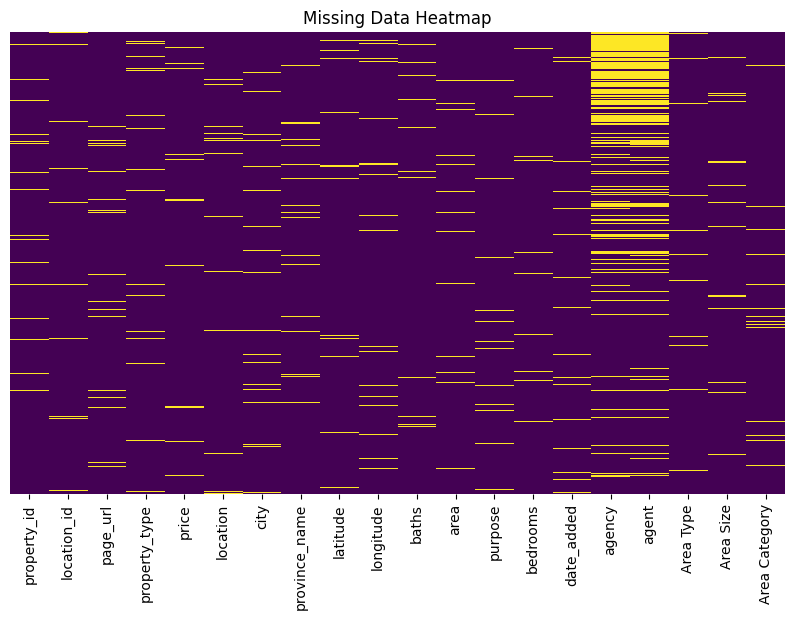

In [475]:
# 2. Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


* None(Null) is Python's standard way of representing a null value for any object.* 
NaN(Not a Number) is a floating-point number used specifically to represent undefined or missing numerical data in scientific computing contexts

In [476]:
print(f"Total number of non-null (valid) observations: {df.notnull().sum().sum()}")
print(f"Total number of missing observations: {df.isnull().sum().sum()}")

Total number of non-null (valid) observations: 3183875
Total number of missing observations: 185045


In [477]:
# Get rows where at least one column has a missing value (first 5 rows)
df_with_missing = df[df.isnull().any(axis=1)][:5]

# Display the rows with missing values
print(df_with_missing)

   property_id  location_id  \
0     237062.0       3325.0   
1     346905.0       3236.0   
2     386513.0        764.0   
3     656161.0        340.0   
5     850762.0       3390.0   

                                            page_url property_type  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   
2  https://www.zameen.com/Property/islamabad_g_15...         House   
3  https://www.zameen.com/Property/islamabad_bani...         House   
5  https://www.zameen.com/Property/ghauri_town_gh...         House   

        price     location       city      province_name   latitude  \
0  10000000.0         G-10  Islamabad  Islamabad Capital  33.679890   
1   6900000.0         E-11  Islamabad  Islamabad Capital        NaN   
2  16500000.0         G-15  Islamabad  Islamabad Capital  33.631486   
3  43500000.0    Bani Gala  Islamabad  Islamabad Capital  33.707573   
5  34500000.0  Ghauri Town  Islamabad

In [478]:
# Get rows where hasn't any missing value (first 5 rows)
df_with_missing = df[df.notnull().all(axis=1)][:5]

# Display the rows with non-missing values
print(df_with_missing)

    property_id  location_id  \
4      841645.0       3226.0   
7     1258636.0       3241.0   
8     1402466.0        376.0   
10    1425602.0        429.0   
16    1947817.0       3075.0   

                                             page_url property_type  \
4   https://www.zameen.com/Property/dha_valley_dha...         House   
7   https://www.zameen.com/Property/e_11_e_11_4_ap...          Flat   
8   https://www.zameen.com/Property/dha_defence_dh...         House   
10  https://www.zameen.com/Property/islamabad_dipl...          Flat   
16  https://www.zameen.com/Property/dha_phase_1_se...         House   

         price            location       city      province_name   latitude  \
4    7000000.0         DHA Defence  Islamabad  Islamabad Capital  33.492591   
7    7800000.0                E-11  Islamabad  Islamabad Capital  33.698244   
8   50000000.0         DHA Defence  Islamabad  Islamabad Capital  33.540894   
10  35000000.0  Diplomatic Enclave  Islamabad  Islamabad Capital

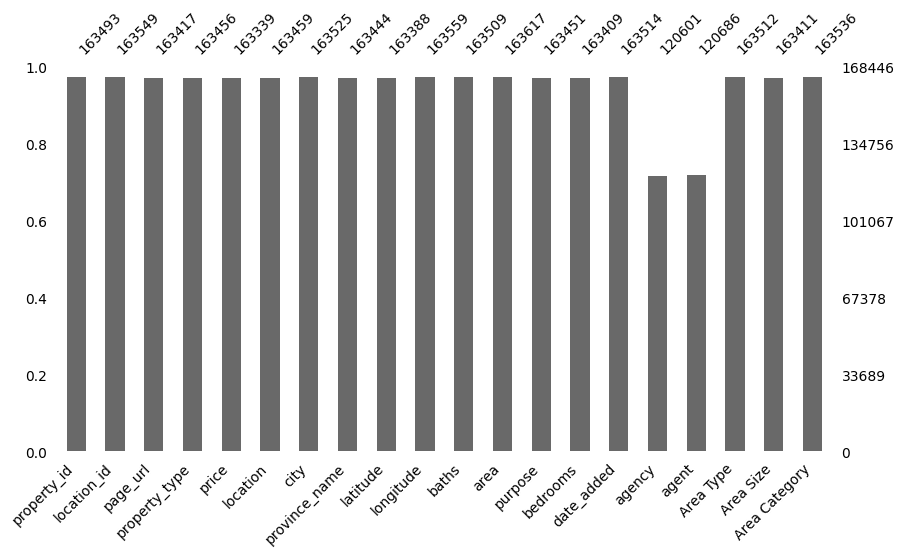

In [479]:
#!pip install missingno -> to install

import missingno as msno   

# Visualize missing data using a bar plot
msno.bar(df = df,
         figsize = (10, 5),
         fontsize = 10);

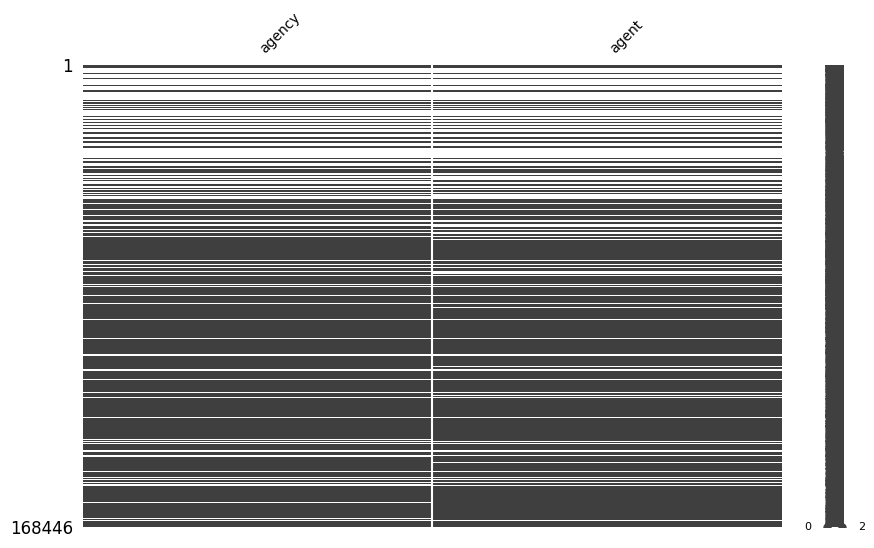

In [480]:
# Visualize missing data relationships between 'agency' and 'agent'

msno.matrix(df = df[['agency', 'agent']],
            figsize = (10, 6),
            fontsize = 10);

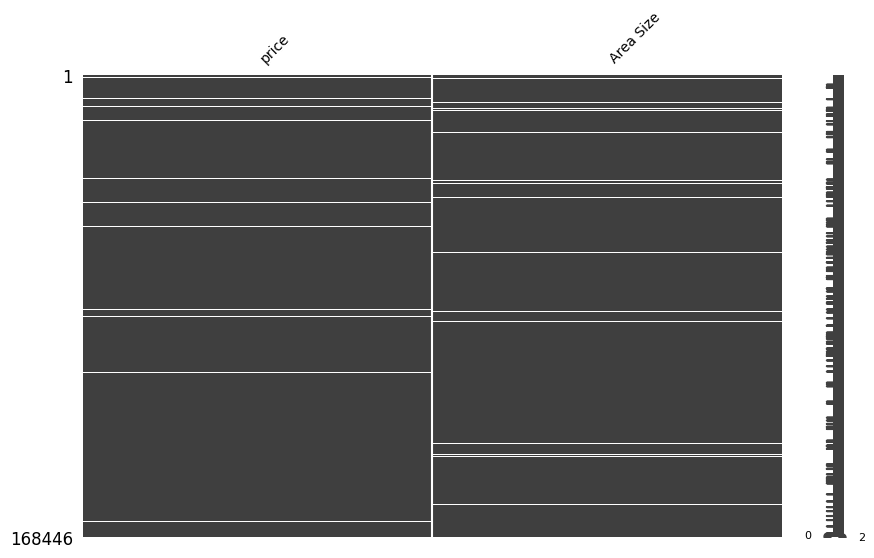

In [481]:
# Visualize missing data relationships between 'agency' and 'agent'

msno.matrix(df = df[['price', 'Area Size']],
            figsize = (10, 6),
            fontsize = 10);

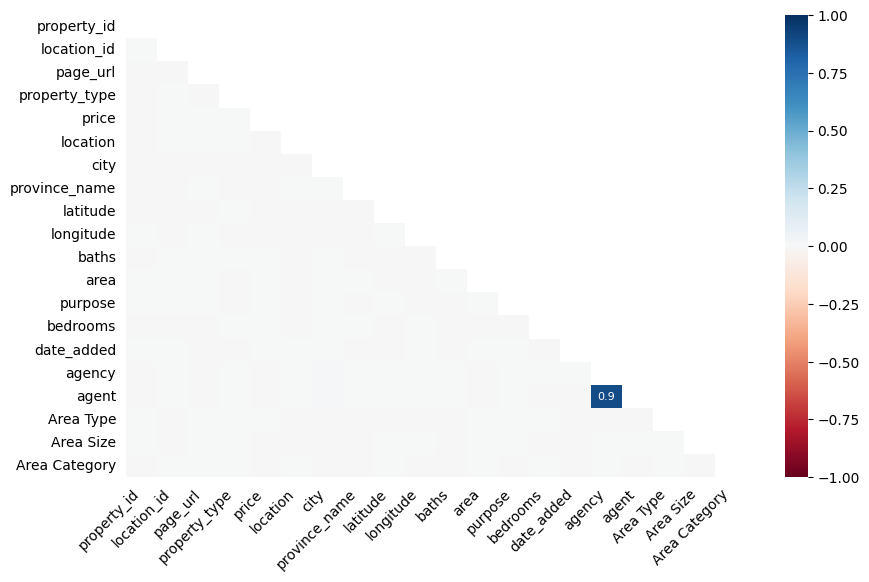

In [482]:
# Visualize the correlation of missing data between columns
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

In [483]:
# 3. Check missing values by column type (numerical and categorical)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Missing data in numerical columns
print("\nMissing Data in Numerical Columns:")
print(df[numerical_columns].isnull().sum())

# Missing data in categorical columns
print("\nMissing Data in Categorical Columns:")
print(df[categorical_columns].isnull().sum())



Missing Data in Numerical Columns:
property_id    4953
location_id    4897
price          5107
latitude       5058
longitude      4887
baths          4937
bedrooms       5037
Area Size      5035
dtype: int64

Missing Data in Categorical Columns:
Series([], dtype: float64)


### 2.2 Method 1: Deleting Missing Data

Deleting missing data is a simple method, but there are important factors to consider before applying it:

1. Ensure Missing Data is Unnatural: If the missing value is natural (e.g., an electric vehicle with no engine size), it might be better to fill it instead of deleting it.
   
2. Impact of Deleting Missing Data: If a significant portion of the dataset has missing values, deleting them could result in losing valuable information. It's important to use methods that minimize data loss to retain as much information as possible for analysis or machine learning.

In [484]:
# Dropping rows with missing values
# inplace = False: Ensures that the operation does not modify the original DataFrame (df).
#The result is a temporary view of the DataFrame with missing value rows removed.

df.dropna(inplace = False)[:5]


# Apply changes permanently by assigning the result back to the original DataFrame
# df = df.dropna()

# OR use inplace=True for permanent changes
# df.dropna(inplace=True)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
4,841645.0,3226.0,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
7,1258636.0,3241.0,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000.0,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2.0,6.2 Marla,For Sale,2.0,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466.0,376.0,https://www.zameen.com/Property/dha_defence_dh...,House,50000000.0,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7.0,1 Kanal,For Sale,7.0,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
10,1425602.0,429.0,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000.0,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3.0,7.1 Marla,For Sale,3.0,06-03-2019,Al Sahar Estate,Zahid H. Usmani,Marla,7.1,5-10 Marla
16,1947817.0,3075.0,https://www.zameen.com/Property/dha_phase_1_se...,House,19000000.0,DHA Defence,Islamabad,Islamabad Capital,33.508481,73.091826,3.0,10 Marla,For Sale,3.0,06-20-2019,Infinity Properties,Ali,Marla,10.0,5-10 Marla


In [485]:
# Dropping rows where all values are NaN
df.dropna(how = 'all')[:5]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,NaN,72.971492,3.0,5.6 Marla,NaN,3.0,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161.0,340.0,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,NaN,2 Kanal,For Sale,4.0,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645.0,3226.0,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [486]:
# Dropping columns with any missing values
df.dropna(axis=1)

""
0
1
2
3
4
...
168441
168442
168443
168444


**We should remove the agency and agent columns because they have a high percentage of missing values (over 28%), which makes them unreliable. Imputing these values could introduce bias or noise, and since these columns likely don't contribute significantly to the target variable (e.g., price), keeping them would complicate the analysis without adding value. Dropping them simplifies the dataset and ensures more accurate results.**

In [487]:
# Dropping the 'agency' and 'agent' columns
df = df.drop(columns=['agency', 'agent'])

# Verify if the columns have been dropped
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,NaN,72.971492,3.0,5.6 Marla,NaN,3.0,05-04-2019,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,Marla,8.0,5-10 Marla
3,656161.0,340.0,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,NaN,2 Kanal,For Sale,4.0,04-05-2019,Kanal,2.0,1-5 Kanal
4,841645.0,3226.0,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3.0,8 Marla,For Sale,3.0,07-10-2019,Marla,8.0,5-10 Marla


This line of code removes the agency and agent columns from the DataFrame df. The columns parameter allows you to specify which columns to drop.

### 2.3 Method 2: Filling Missing Values

The decision to fill missing values, like removing them, must be made carefully and thoughtfully. Filling missing data can introduce noise into the dataset and compromise its statistical reliability. In analytical scenarios, it may lead to incorrect insights. Therefore, even in cases where the decision to fill missing values is well-founded, the potential bias introduced by this action should always be considered.

### Why Make a Copy?
Experimentation Safety: By working on a copy, you can try different filling techniques without altering the original dataset.
Preserve Original Data: The original df remains unmodified, which is useful for comparison or if you need to return to the original dataset.

In [488]:
# Create a copy of the DataFrame for filling missing values
df_fillna = df.copy()

# Display the first three rows of the copied DataFrame
df_fillna.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
0,237062.0,3325.0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2.0,4 Marla,For Sale,2.0,02-04-2019,Marla,4.0,0-5 Marla
1,346905.0,3236.0,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,NaN,72.971492,3.0,5.6 Marla,NaN,3.0,05-04-2019,Marla,5.6,5-10 Marla
2,386513.0,764.0,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6.0,8 Marla,For Sale,5.0,07-17-2019,Marla,8.0,5-10 Marla


In [489]:
# Identify the number of missing values (NaN) in each column of the DataFrame
df_fillna.isna().sum() 

property_id      4953
location_id      4897
page_url         5029
property_type    4990
price            5107
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64

#### 2.3.1 Filling Missing Values in Numerical Variables

In [490]:
# fills missing values column of the DataFrame df_fillna with the column's mean value.
mean_price = df_fillna['price'].mean()

df_fillna['price'].fillna(value = mean_price, inplace = True)

df_fillna.isna().sum()

/tmp/ipykernel_30/3190121034.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['price'].fillna(value = mean_price, inplace = True)


property_id      4953
location_id      4897
page_url         5029
property_type    4990
price               0
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64

In [491]:
# [1:]: The slice notation [1:] means "take all elements from index 1 to the end of the list.
numerical_features[1:]

['location_id',
 'price',
 'latitude',
 'longitude',
 'baths',
 'bedrooms',
 'Area Size']

In [492]:
# Subset of Numerical Features
to_be_filled = numerical_features[1:]

#Loop Through Columns
      # Fill Missing Values with the Column Mean:
for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace=True)


df_fillna.isna().sum()

/tmp/ipykernel_30/1648329556.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(df[col].mean(), inplace=True)


property_id      4953
location_id         0
page_url         5029
property_type    4990
price               0
location         4987
city             4921
province_name    5002
latitude            0
longitude           0
baths               0
area             4829
purpose          4995
bedrooms            0
date_added       4932
Area Type        4934
Area Size           0
Area Category    4910
dtype: int64

In [493]:
# transposes the output to swap rows and columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,163493.0,1.559695e+07,2.251128e+06,86575.000000,1.488404e+07,1.666004e+07,1.708684e+07,1.735772e+07
location_id,163549.0,4.378391e+03,3.776767e+03,1.000000,1.058000e+03,3.291000e+03,7.220000e+03,1.422000e+04
price,163339.0,1.776443e+07,3.487839e+07,0.000000,1.750000e+05,8.500000e+06,1.950000e+07,1.450000e+09
latitude,163388.0,2.986180e+01,3.807774e+00,11.052446,2.494894e+01,3.146019e+01,3.356089e+01,7.318409e+01
longitude,163559.0,7.124184e+01,3.132698e+00,25.906027,6.713036e+01,7.305618e+01,7.326611e+01,8.016143e+01
baths,163509.0,2.873719e+00,2.470112e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
bedrooms,163409.0,3.179537e+00,1.971420e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01
Area Size,163411.0,5.888307e+00,5.759333e+00,0.000000,3.000000e+00,5.000000e+00,8.000000e+00,8.000000e+02



**We can perform the imputation using the median instead of the mean, but this is usually preferred in skewed distributions.The median is less sensitive to outliers compared to the mean, so it can be a better choice when the data is skewed, meaning there are extreme values that could disproportionately affect the mean.**


![](http://cdn.prod.website-files.com/6064b31ff49a2d31e0493af1/67038ad30512aba749353221_6630ac0546fdee3e9ab8f709_XJNH9uRcKJLJGQpt7mnmmtIGHjbfPBeeBoZElzdqvJqyl6CBo5jd1Bxa-e80ZYnhpGcOCpXBV2QfoStZnVu9zXTJ2q2m2BsKFphgvg8ZGvsQSFr48L5nCkGmXVfgTCWk3QSV5amx2TqYYIZXZvwF0Mg.png)

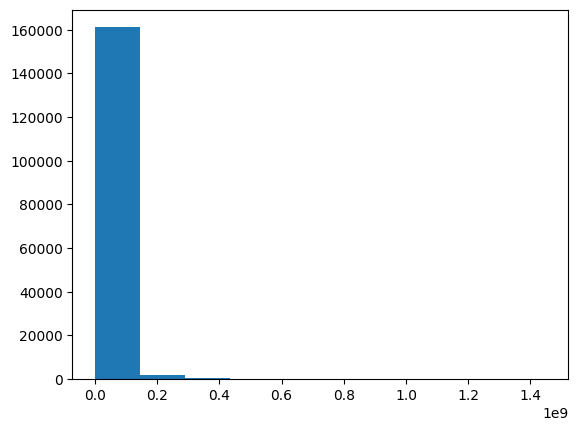

In [494]:
plt.hist(df['price'])  # Create histogram for 'salary' column
plt.show()  # Display the plot

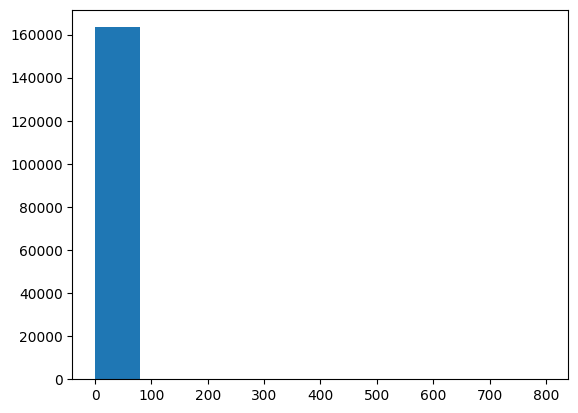

In [495]:
plt.hist(df['Area Size'])  # Create histogram for 'salary' column
plt.show()  # Display the plot

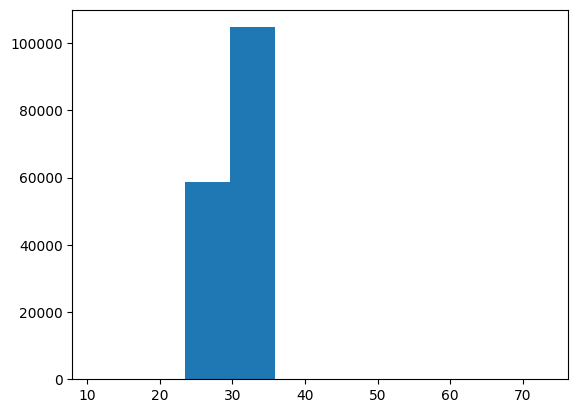

In [496]:
plt.hist(df['latitude'])  # Create histogram for 'salary' column
plt.show()  # Display the plot


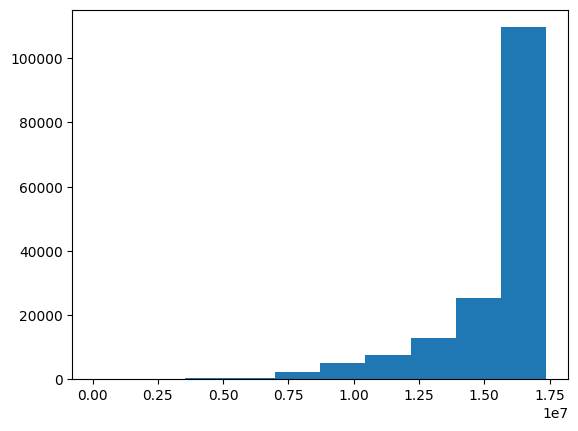

In [497]:
plt.hist(df['property_id'])  # Create histogram for 'salary' column
plt.show()  # Display the plot


**Our dataset contains numerical variables that are skewed or contain outliers, using the mean to fill missing values can be misleading because the mean is sensitive to extreme values. In such cases, it is often better to use the median, as it is less affected by outliers and skewed distributions.So now filling missing values in the numerical columns, them with the median instead of the mean:**


> Filling Missing Values with Median

In [498]:
# Create a new copy of the original DataFrame for filling missing values with the median
df_fillna_median = df.copy()

# Fill missing values with the median for numerical columns
numerical_columns = df_fillna_median.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    median_value = df_fillna_median[col].median()
    df_fillna_median[col].fillna(median_value, inplace=True)

# Check if there are any missing values remaining in the newly copied dataframe
missing_values_copy_median = df_fillna_median.isnull().sum()

# Display missing values for each column in the copied dataframe
print("Missing values in each column after filling with the median in the newly copied dataset:")
print(missing_values_copy_median[missing_values_copy_median > 0])


Missing values in each column after filling with the median in the newly copied dataset:
page_url         5029
property_type    4990
location         4987
city             4921
province_name    5002
area             4829
purpose          4995
date_added       4932
Area Type        4934
Area Category    4910
dtype: int64


/tmp/ipykernel_30/54468374.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna_median[col].fillna(median_value, inplace=True)
/tmp/ipykernel_30/54468374.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [499]:
# Check for missing values after filling
missing_values = df.isnull().sum()

# Display missing values for each column
print("Missing values in each column after filling with the median:")
print(missing_values[missing_values > 0])  # Only show columns with missing values


Missing values in each column after filling with the median:
property_id      4953
location_id      4897
page_url         5029
property_type    4990
price            5107
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64


In [500]:
df_fillna.isna().sum()

property_id      4953
location_id         0
page_url         5029
property_type    4990
price               0
location         4987
city             4921
province_name    5002
latitude            0
longitude           0
baths               0
area             4829
purpose          4995
bedrooms            0
date_added       4932
Area Type        4934
Area Size           0
Area Category    4910
dtype: int64

#### 2.3.2 Filling Missing Values for Categorical Variables

Now lets fill the other values

In [501]:
# Filling Missing Values for a Categorical Variable with Mode

# Check the number of missing values in the 'area' column
df_fillna['area'].isna().sum()

# Get the most frequent value (mode) in the 'area' column
work_setting_mode = df_fillna['area'].mode()

# Fill the missing values in 'area' with the mode value
df_fillna['area'] = df_fillna['area'].fillna(value=work_setting_mode[0])

# Check again for missing values in the dataset
df_fillna.isna().sum()

property_id      4953
location_id         0
page_url         5029
property_type    4990
price               0
location         4987
city             4921
province_name    5002
latitude            0
longitude           0
baths               0
area                0
purpose          4995
bedrooms            0
date_added       4932
Area Type        4934
Area Size           0
Area Category    4910
dtype: int64

In [502]:
df_fillna[["province_name"]][:20]

,province_name
0,Islamabad Capital
1,Islamabad Capital
2,Islamabad Capital
3,Islamabad Capital
4,Islamabad Capital
5,Islamabad Capital
6,Islamabad Capital
7,Islamabad Capital
8,Islamabad Capital
9,Islamabad Capital


In [503]:
# Filling Missing Values with the Previous Value (Backward Fill)
# df_fillna["agency"].fillna(method="bfill", inplace=True)

# df_fillna[["agency"]][:20]

In [504]:
# Filling Missing Values with the Next Value (Forward Fill)
df_fillna["province_name"].fillna(method="ffill", inplace=True)

df_fillna[["province_name"]][:20]

/tmp/ipykernel_30/2948932610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna["province_name"].fillna(method="ffill", inplace=True)
/tmp/ipykernel_30/2948932610.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["province_name"].fillna(method="ffill", inplace=True)


,province_name
0,Islamabad Capital
1,Islamabad Capital
2,Islamabad Capital
3,Islamabad Capital
4,Islamabad Capital
5,Islamabad Capital
6,Islamabad Capital
7,Islamabad Capital
8,Islamabad Capital
9,Islamabad Capital


#### 2.3.3 Filling Missing Data Using Group-Based Imputation
Simple methods like filling missing values with the mean or median are quick solutions but may not always capture the complexity of the data. A more effective approach involves using group-level patterns to fill missing values.

For example, instead of filling missing salaries with the overall mean, we can use the job_title column to group the data. Missing salaries for a specific job (e.g., Data Engineer) can then be filled with the average or median salary of that job group.

This approach preserves the unique characteristics of each category, leading to more accurate and meaningful imputation.

In [505]:
# summary of missing values for each column
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

property_id      4953
location_id      4897
page_url         5029
property_type    4990
price            5107
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64

In [506]:
df_categorical_fillna["price"].fillna(value = df_categorical_fillna.groupby("province_name")["price"].transform("mean"),
                                       inplace = True)

/tmp/ipykernel_30/3102288899.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_categorical_fillna["price"].fillna(value = df_categorical_fillna.groupby("province_name")["price"].transform("mean"),
/tmp/ipykernel_30/3102288899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical_fillna["price"].fillna(value = df_categori

In [507]:
df_categorical_fillna.isna().sum()

property_id      4953
location_id      4897
page_url         5029
property_type    4990
price             143
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64

Still the total value of the missing values ​​is not that in the price row because there may be values ​​that are both missing at the same time.

In [508]:
# Values ​​that are both missing at the same time
df_categorical_fillna[df_categorical_fillna[["province_name", "price"]].isna().all(axis=1)][["province_name", "price"]]

,province_name,price
175,NaN,NaN
1165,NaN,NaN
2032,NaN,NaN
2829,NaN,NaN
5909,NaN,NaN
...,...,...
161010,NaN,NaN
161854,NaN,NaN
164411,NaN,NaN
165511,NaN,NaN


In [509]:
# It extracts and displays all rows in the DataFrame df_categorical_fillna where the salary column contains missing (NaN) values.

df_categorical_fillna[df_categorical_fillna['price'].isnull()]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
175,2804200.0,9522.0,https://www.zameen.com/Property/karachi_abul_h...,Flat,NaN,Abul Hassan Isphani Road,Karachi,NaN,24.941817,67.098056,2.0,3.2 Marla,For Sale,2.0,06-07-2019,Marla,3.2,0-5 Marla
1165,7647113.0,8503.0,https://www.zameen.com/Property/dha_phase_8_em...,Penthouse,NaN,DHA Defence,Karachi,NaN,24.752502,67.074019,6.0,1.4 Kanal,For Sale,5.0,06-30-2019,Kanal,1.4,1-5 Kanal
2032,8267175.0,5.0,https://www.zameen.com/Property/karachi_clifto...,NaN,NaN,Clifton,Karachi,NaN,24.825028,67.031579,4.0,11.1 Marla,For Sale,4.0,04-06-2019,Marla,11.1,10-15 Marla
2829,8549179.0,9487.0,https://www.zameen.com/Property/karachi_hub_ri...,House,NaN,Hub River Road,Karachi,NaN,24.929090,66.942561,0.0,4.8 Marla,For Sale,7.0,07-18-2019,Marla,4.8,0-5 Marla
5909,9838947.0,1784.0,https://www.zameen.com/Property/bahria_town_ba...,House,NaN,Bahria Town,Lahore,NaN,31.374195,74.191480,4.0,5 Marla,For Sale,3.0,07-03-2019,Marla,5.0,0-5 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161010,17313326.0,10018.0,https://www.zameen.com/Property/bahria_town_ka...,House,NaN,NaN,Karachi,NaN,25.058062,67.306626,3.0,8 Marla,For Rent,3.0,07-17-2019,Marla,8.0,5-10 Marla
161854,17317381.0,13623.0,https://www.zameen.com/Property/dha_defence_ph...,House,NaN,DHA Defence,Islamabad,NaN,33.535435,73.175454,3.0,3 Kanal,For Sale,3.0,07-16-2019,Kanal,3.0,1-5 Kanal
164411,17333418.0,NaN,https://www.zameen.com/Property/dha_valley_dha...,House,NaN,DHA Defence,Islamabad,NaN,33.492591,73.301339,0.0,5 Marla,For Sale,0.0,07-18-2019,Marla,5.0,0-5 Marla
165511,NaN,1484.0,https://www.zameen.com/Property/d_h_a_dha_phas...,House,NaN,DHA Defence,Karachi,NaN,24.821639,67.071691,4.0,4 Marla,For Rent,3.0,07-17-2019,Marla,4.0,0-5 Marla


In [510]:
df_categorical_fillna.isna().sum()

property_id      4953
location_id      4897
page_url         5029
property_type    4990
price             143
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64

Steps for Group-Based Imputation:

* Choose Grouping Columns:
Identify relevant grouping variables that may explain the distribution of the missing values.
For example:
city
property_type

* Fill Missing Data:
For each column with missing data, group by the relevant column(s) and fill missing values with group-specific aggregates.



In [511]:
# Fill missing values in 'price' based on the mean of its 'province_name' group
df_categorical_fillna["price"] = df_categorical_fillna["price"].fillna(
    df_categorical_fillna.groupby("province_name")["price"].transform("mean")
)

# Handle any remaining missing values (e.g., if a province has all NaN prices)
df_categorical_fillna["price"].fillna(df_categorical_fillna["price"].median(), inplace=True)

# Verify that no missing values remain
print(df_categorical_fillna["price"].isnull().sum())



0


/tmp/ipykernel_30/4183854114.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_categorical_fillna.groupby("province_name")["price"].transform("mean")
/tmp/ipykernel_30/4183854114.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical_fillna["price"].fillna(df_categorical_fillna["price"].median(), inplace=True)


In [512]:
df_categorical_fillna.isna().sum()

property_id      4953
location_id      4897
page_url         5029
property_type    4990
price               0
location         4987
city             4921
province_name    5002
latitude         5058
longitude        4887
baths            4937
area             4829
purpose          4995
bedrooms         5037
date_added       4932
Area Type        4934
Area Size        5035
Area Category    4910
dtype: int64

In [513]:
# Create a copy of the original DataFrame to preserve the data
df_filled = df.copy()

# Use forward fill followed by backward fill to handle all missing values
df_filled.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value
df_filled.fillna(method='bfill', inplace=True)  # Fill any remaining missing values with the next value

# Verify that there are no missing values left
print(df_filled.isnull().sum())


/tmp/ipykernel_30/2438448562.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled.fillna(method='ffill', inplace=True)  # Fill missing values with the previous value
/tmp/ipykernel_30/2438448562.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled.fillna(method='bfill', inplace=True)  # Fill any remaining missing values with the next value


property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


Step 1: Identify Numerical and Categorical Variables

In [514]:
# Create a copy of the dataset
df_filled = df.copy()

# Separate numerical and categorical columns
numerical_columns = df_filled.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df_filled.select_dtypes(include=["object", "category"]).columns


Step 2: Fill Missing Values in Numerical Variables

In [515]:
# Fill missing values in numerical columns with the median
for col in numerical_columns:
    if df_filled[col].isnull().sum() > 0:  # Check if column has missing values
        df_filled[col].fillna(df_filled[col].median(), inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median: {df_filled[col].median()}")


/tmp/ipykernel_30/1447925713.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].median(), inplace=True)


Filled missing values in numerical column 'property_id' with median: 16660036.0
Filled missing values in numerical column 'location_id' with median: 3291.0
Filled missing values in numerical column 'price' with median: 8500000.0
Filled missing values in numerical column 'latitude' with median: 31.460187
Filled missing values in numerical column 'longitude' with median: 73.05618199999999
Filled missing values in numerical column 'baths' with median: 3.0
Filled missing values in numerical column 'bedrooms' with median: 3.0
Filled missing values in numerical column 'Area Size' with median: 5.0


/tmp/ipykernel_30/1447925713.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].median(), inplace=True)
/tmp/ipykernel_30/1447925713.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Step 3: Fill Missing Values in Categorical Variables

In [516]:
# Fill missing values in categorical columns with forward fill, then backward fill as a fallback
for col in categorical_columns:
    if df_filled[col].isnull().sum() > 0:  # Check if column has missing values
        df_filled[col].fillna(method="ffill", inplace=True)
        df_filled[col].fillna(method="bfill", inplace=True)
        print(f"Filled missing values in categorical column '{col}' with forward fill, then backward fill.")


Filled missing values in categorical column 'page_url' with forward fill, then backward fill.
Filled missing values in categorical column 'property_type' with forward fill, then backward fill.
Filled missing values in categorical column 'location' with forward fill, then backward fill.
Filled missing values in categorical column 'city' with forward fill, then backward fill.
Filled missing values in categorical column 'province_name' with forward fill, then backward fill.
Filled missing values in categorical column 'area' with forward fill, then backward fill.
Filled missing values in categorical column 'purpose' with forward fill, then backward fill.
Filled missing values in categorical column 'date_added' with forward fill, then backward fill.
Filled missing values in categorical column 'Area Type' with forward fill, then backward fill.
Filled missing values in categorical column 'Area Category' with forward fill, then backward fill.


/tmp/ipykernel_30/44602055.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(method="ffill", inplace=True)
/tmp/ipykernel_30/44602055.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled[col].fillna(method="ffill", inplace=True)
/tmp/ipykernel_30/44602055.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled[col

Final Check: Verify Missing Values

In [517]:
# Check if there are any missing values left
print(df_filled.isnull().sum())


property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


The dataset will have no missing values, with numerical (I used median) and categorical (I used forward fill, then backward fill) variables handled using appropriate methods.

NOW I DO SAME THING DIRECTLLY WITHOUT CREATING A COPY

**Step 1: Identify Numerical and Categorical Variables**

In [518]:
# Separate numerical and categorical columns in the original dataset
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns


**Step 2: Fill Missing Values in Numerical Variables**

In [519]:
# Fill missing values in numerical columns with the median
for col in numerical_columns:
    if df[col].isnull().sum() > 0:  # Check if column has missing values
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in numerical column '{col}' with median: {df[col].median()}")


/tmp/ipykernel_30/2010902819.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_30/2010902819.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Filled missing values in numerical column 'property_id' with median: 16660036.0
Filled missing values in numerical column 'location_id' with median: 3291.0
Filled missing values in numerical column 'price' with median: 8500000.0
Filled missing values in numerical column 'latitude' with median: 31.460187
Filled missing values in numerical column 'longitude' with median: 73.05618199999999
Filled missing values in numerical column 'baths' with median: 3.0
Filled missing values in numerical column 'bedrooms' with median: 3.0
Filled missing values in numerical column 'Area Size' with median: 5.0


/tmp/ipykernel_30/2010902819.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_30/2010902819.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**Step 3: Fill Missing Values in Categorical Variables**

In [520]:
# Fill missing values in categorical columns with forward fill, then backward fill as a fallback
for col in categorical_columns:
    if df[col].isnull().sum() > 0:  # Check if column has missing values
        df[col].fillna(method="ffill", inplace=True)
        df[col].fillna(method="bfill", inplace=True)
        print(f"Filled missing values in categorical column '{col}' with forward fill, then backward fill.")


Filled missing values in categorical column 'page_url' with forward fill, then backward fill.
Filled missing values in categorical column 'property_type' with forward fill, then backward fill.
Filled missing values in categorical column 'location' with forward fill, then backward fill.
Filled missing values in categorical column 'city' with forward fill, then backward fill.
Filled missing values in categorical column 'province_name' with forward fill, then backward fill.
Filled missing values in categorical column 'area' with forward fill, then backward fill.
Filled missing values in categorical column 'purpose' with forward fill, then backward fill.
Filled missing values in categorical column 'date_added' with forward fill, then backward fill.
Filled missing values in categorical column 'Area Type' with forward fill, then backward fill.
Filled missing values in categorical column 'Area Category' with forward fill, then backward fill.


/tmp/ipykernel_30/135309557.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method="ffill", inplace=True)
/tmp/ipykernel_30/135309557.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method="ffill", inplace=True)
/tmp/ipykernel_30/135309557.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method="b

**Final Check: Verify Missing Values**

In [521]:
# Check if there are any missing values left
print("Remaining missing values after processing:")
print(df.isnull().sum())


Remaining missing values after processing:
property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
Area Type        0
Area Size        0
Area Category    0
dtype: int64


## 3. Categorical Variable Analysis

In [522]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

### 3.1 Categorical Variable Operations

In [523]:
# selecting all columns in the DataFrame df that have the data type "object", which typically represents categorical or string variables
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,page_url,property_type,location,city,province_name,area,purpose,date_added,agency,agent,Area Type,Area Category
0,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,G-10,Islamabad,Islamabad Capital,4 Marla,For Sale,02-04-2019,NaN,NaN,Marla,0-5 Marla
1,https://www.zameen.com/Property/e_11_2_service...,Flat,E-11,Islamabad,Islamabad Capital,5.6 Marla,For Sale,05-04-2019,NaN,NaN,Marla,5-10 Marla
2,https://www.zameen.com/Property/islamabad_g_15...,House,G-15,Islamabad,Islamabad Capital,8 Marla,For Sale,07-17-2019,NaN,NaN,Marla,5-10 Marla


In [524]:
# returns an array of the unique values found in the salary_currency column of the df_categorical DataFrame
df_categorical["agent"].unique()

array([nan, 'Muhammad Junaid Ceo Muhammad Shahid Director',
       'Balqiaz Marwat', ..., 'Ahmed Arslan', 'Muhammad Hasan, Farrukh',
       'Basit Aziz'], dtype=object)

In [525]:
# nunique() function is used to count the number of unique values in each categorical column.
# showing how many unique values exist in each categorical feature

for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 168446 unique values in "page_url" categorical feature.

There are 7 unique values in "property_type" categorical feature.

There are 1509 unique values in "location" categorical feature.

There are 5 unique values in "city" categorical feature.

There are 3 unique values in "province_name" categorical feature.

There are 344 unique values in "area" categorical feature.

There are 2 unique values in "purpose" categorical feature.

There are 124 unique values in "date_added" categorical feature.

There are 5761 unique values in "agency" categorical feature.

There are 10598 unique values in "agent" categorical feature.

There are 2 unique values in "Area Type" categorical feature.

There are 22 unique values in "Area Category" categorical feature.



In [526]:
# value_counts() count of each unique value in the column, sorted by frequency
# The separator (**********) makes the output more readable when there are multiple columns with value_counts() results

for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

page_url
https://www.zameen.com/Property/g_10_g_10_2_ground_floor_corner_apartment_with_green_lawn_for_sale-237062-3325-1.html                                                             1
https://www.zameen.com/Property/d_h_a_dha_phase_6_500_yard_beautifull_bunglow_for_rent_in_prime_location-17003540-1483-4.html                                                     1
https://www.zameen.com/Property/d_h_a_dha_phase_6_1000_yard_must_prime_location_in_dha_phase_6_with_pool_and_basement-17003653-1483-4.html                                        1
https://www.zameen.com/Property/dha_valley_dha_homes_here_is_a_good_opportunity_to_live_in_a_well_built_house-17003693-3226-1.html                                                1
https://www.zameen.com/Property/dha_valley_dha_homes_here_is_a_good_opportunity_to_live_in_a_well_built_house-17003703-3226-1.html                                                1
                                                                                           

In [527]:
# extracting the unique values from the province_name column and converting them into a list
province_name_categories = df["province_name"].unique().tolist()[::-1]
province_name_categories

['Sindh', 'Punjab', 'Islamabad Capital']

In [528]:
# creating an ordinal categorical variable
# transforms the company_size column into an ordinal categorical variable with an explicitly defined order

from pandas.api.types import CategoricalDtype

df["province_name"] = df["province_name"].astype(CategoricalDtype(categories = province_name_categories, ordered = True))

In [529]:
df["province_name"].head()

0    Islamabad Capital
1    Islamabad Capital
2    Islamabad Capital
3    Islamabad Capital
4    Islamabad Capital
Name: province_name, dtype: category
Categories (3, object): ['Sindh' < 'Punjab' < 'Islamabad Capital']

In [530]:
# astype('category') simply converts a column to the categorical type, but it does not impose any specific order on the categories.
# It turns the column into a nominal categorical type by default (categories without a specific order).

# df["company_size"] = df["company_size"].astype('category')



# CategoricalDtype allows for more control over the categorical type, including specifying the categories and defining whether they are ordered (ordinal) or not.
# This is useful when you want to ensure that the column behaves as an ordinal variable with a specified ordering.

# from pandas.api.types import CategoricalDtype
# df["company_size"] = df["company_size"].astype(CategoricalDtype(categories = comp_categories, ordered = True))


**Key Difference**:
* astype('category'): Converts to categorical type without specifying order.
* CategoricalDtype: Allows for specifying both the categories and whether they are ordered, making it ideal for ordinal variables.

### 3.2 Visualizing Categorical Variables

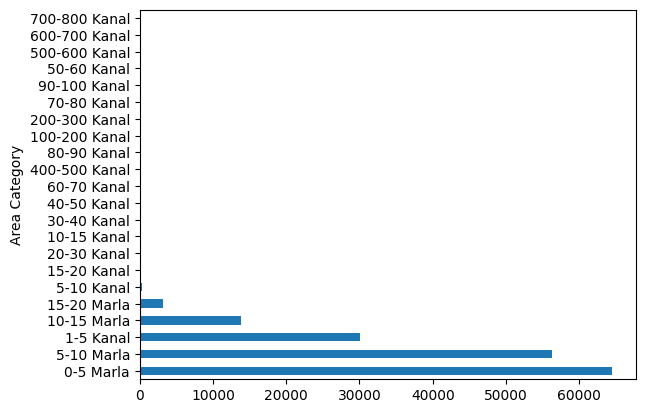

In [531]:
# provided generates a horizontal bar plot to visualize the counts of each category in the Area Category column
df['Area Category'].value_counts().plot.barh();

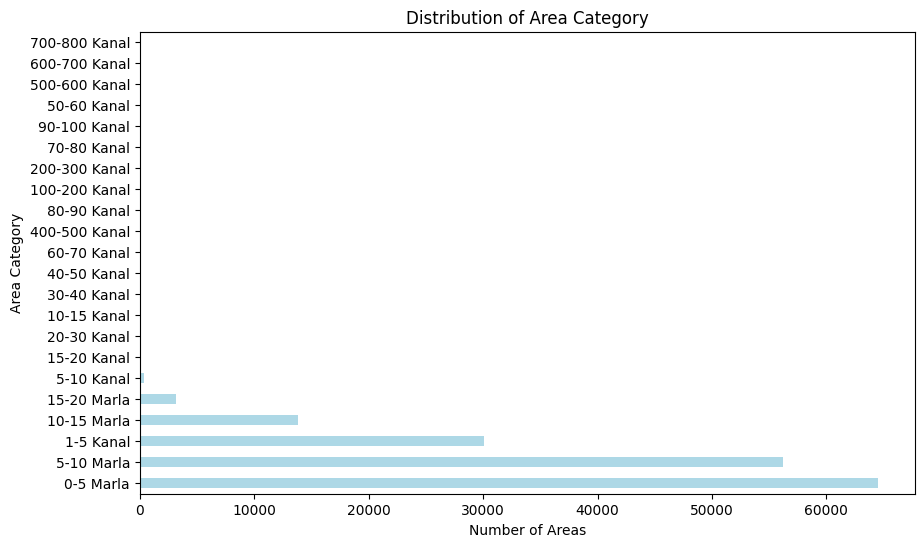

In [532]:
# Customize the plot with labels, title, and different color schemes

df['Area Category'].value_counts().plot.barh(color='lightblue', figsize=(10, 6))
plt.title('Distribution of Area Category')
plt.xlabel('Number of Areas')
plt.ylabel('Area Category')
plt.show()

In [533]:
# Select categorical variables from the dataset
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
print("Categorical Variables:")
print(categorical_columns)


Categorical Variables:
Index(['page_url', 'property_type', 'location', 'city', 'province_name',
       'area', 'purpose', 'date_added', 'agency', 'agent', 'Area Type',
       'Area Category'],
      dtype='object')


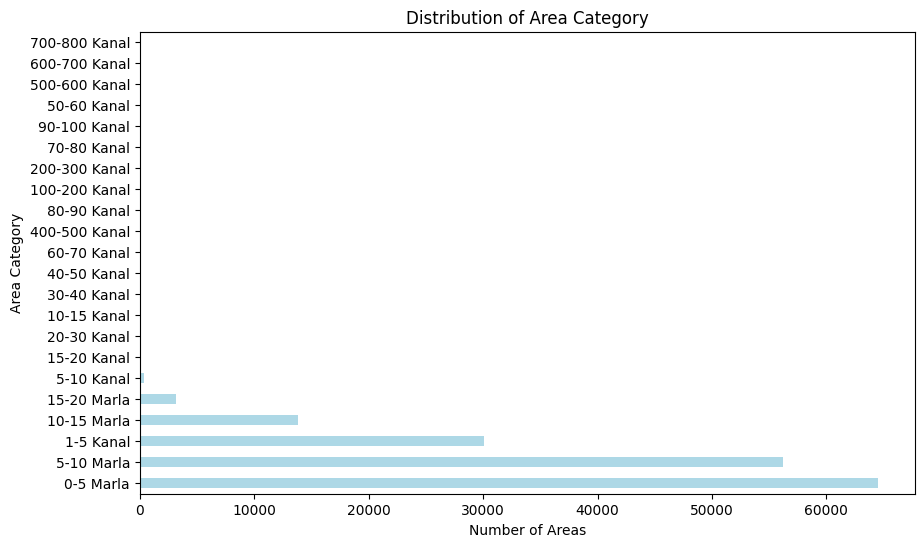

In [534]:
# Customize the plot with labels, title, and different color schemes

df['Area Category'].value_counts().plot.barh(color='lightblue', figsize=(10, 6))
plt.title('Distribution of Area Category')
plt.xlabel('Number of Areas')
plt.ylabel('Area Category')
plt.show()


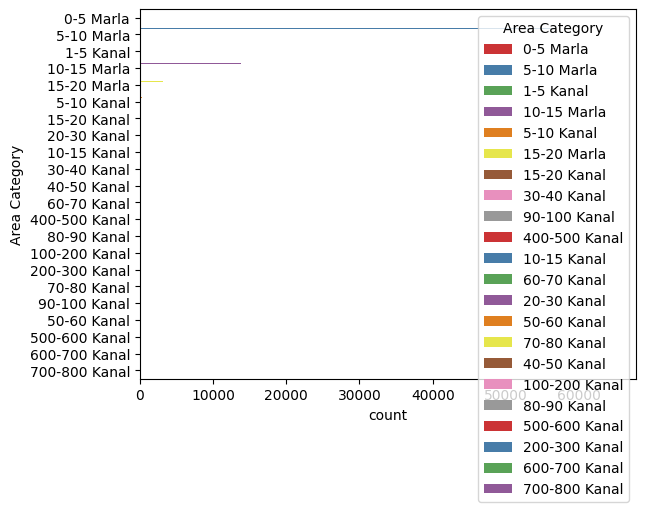

In [535]:
# using Seaborn (sns) to create a count plot, which is a great way to visualize the distribution of categorical data

sns.countplot(data = df,
              y = "Area Category",
              hue = "Area Category",
              order = df["Area Category"].value_counts().index,
              palette = "Set1");

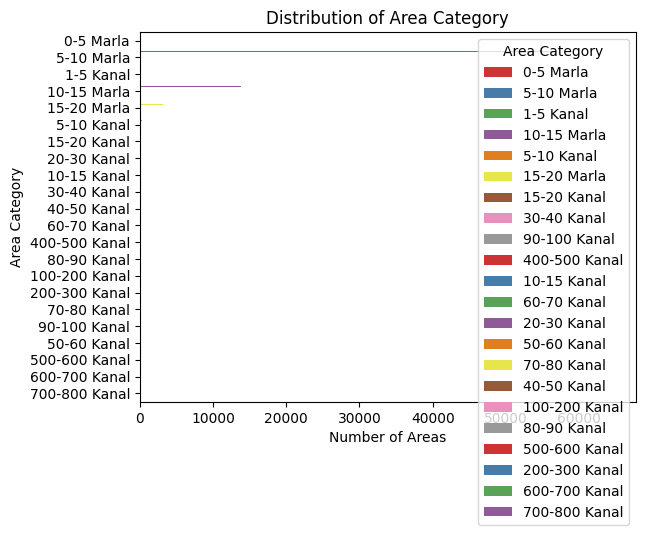

In [536]:
# customize the plot by adjusting labels and title

import matplotlib.pyplot as plt

sns.countplot(data = df,
              y = "Area Category",
              hue = "Area Category",
              order = df["Area Category"].value_counts().index,
              palette = "Set1")
plt.title('Distribution of Area Category')
plt.xlabel('Number of Areas')
plt.ylabel('Area Category')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


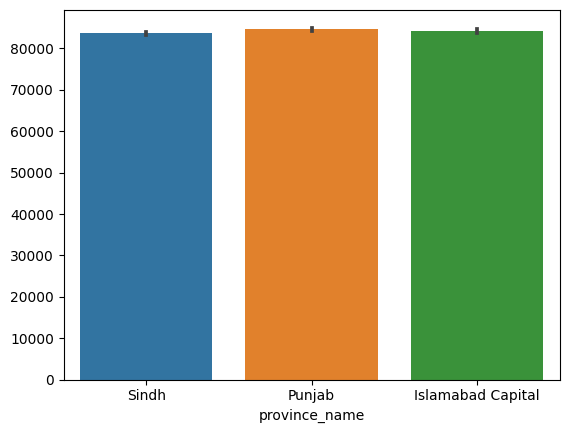

In [537]:
# To visualize the number of occurrences (count) of each unique value in company_size
# Use the countplot() function as follows

sns.barplot(data = df, x = "province_name", y = df.province_name.index);



In [538]:
print(f'{df_categorical["province_name"].value_counts()}')


province_name
Punjab               70536
Sindh                60484
Islamabad Capital    37426
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


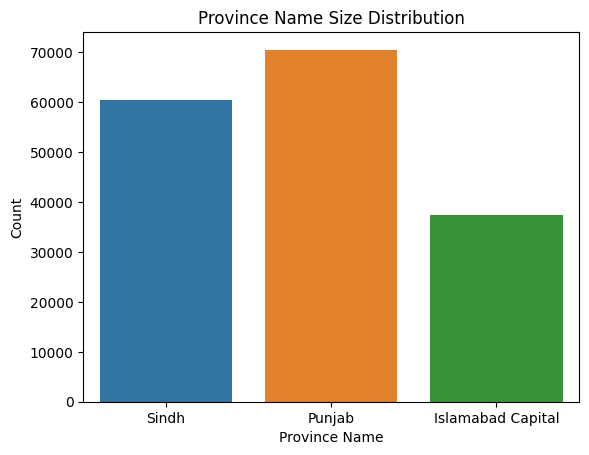

In [539]:
# Visualizing the count of each unique company_size
# Shows a bar plot representing the count of each company_size category in the dataset

sns.countplot(data = df, x = "province_name")
plt.title('Province Name Size Distribution')
plt.xlabel('Province Name')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


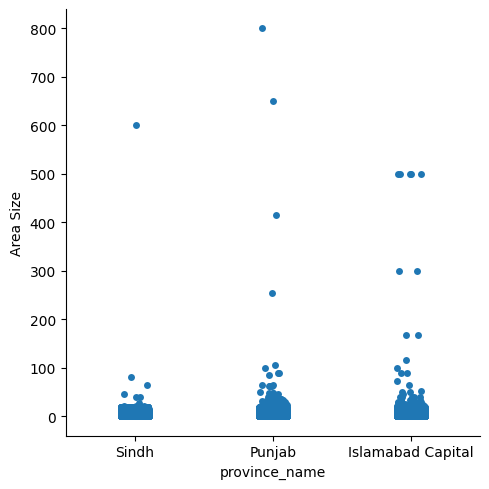

In [540]:
# sns.catplot() to create a categorical plot where the x-axis represents the categorical variable province_name
# the y-axis represents the continuous variable Area Size.


sns.catplot(data = df,
            x = "province_name",
            y = "Area Size");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


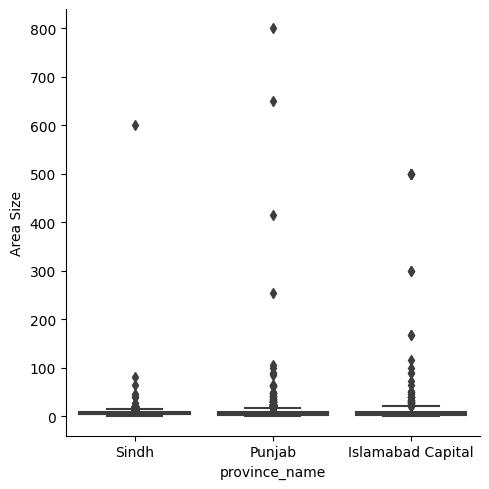

In [541]:
# To show a box plot

sns.catplot(data = df,
            x = "province_name",
            y = "Area Size",
            kind = "box");


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


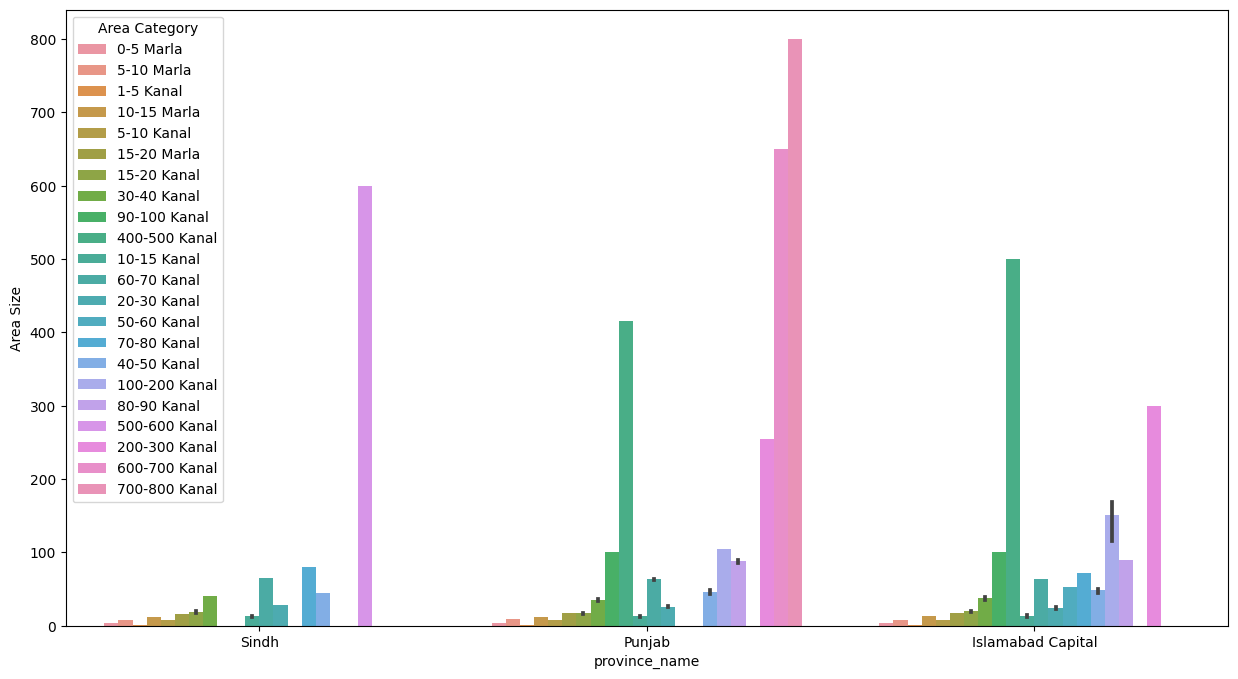

In [542]:
# visualization can help you compare the average area sizes across provinces
# see how they are distributed in terms of the area category

plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "province_name",
            y = "Area Size",
            hue = "Area Category");

* The x-axis represents different provinces (or regions).
* The y-axis shows the average area size for each province.
* The hue (color) differentiates the bars by area category (e.g., small, medium, large), allowing a comparison of the area sizes across provinces and how they are grouped by area category.

### 3.3 Categorical Grouping (groupby) Operations

In [543]:
# display the first 5 rows of the DataFrame df
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [544]:
# Shows the average price for each property type, sorted from the highest average price to the lowest

df_usd = df.groupby(by = "Area Size")["price"].mean().to_frame().reset_index().sort_values(by = "price", ascending = False)

df_usd

,Area Size,price
242,416.0,884000000.0
241,300.0,450000000.0
229,64.0,400000000.0
209,28.0,317500000.0
239,168.0,300000000.0
...,...,...
233,80.0,33000.0
246,800.0,16000.0
3,0.3,13000.0
217,35.0,13000.0


In [545]:
# performs a multi-level grouping operation to calculate the average price for each combination of property_type and Area Size

df.groupby(by = ['property_type', 'Area Size'])['price'].mean().to_frame().reset_index().sort_values(by = "price", ascending = False)[:5]

,property_type,Area Size,price
85,Farm House,416.0,884000000.0
84,Farm House,300.0,450000000.0
78,Farm House,64.0,400000000.0
68,Farm House,28.0,317500000.0
82,Farm House,168.0,300000000.0


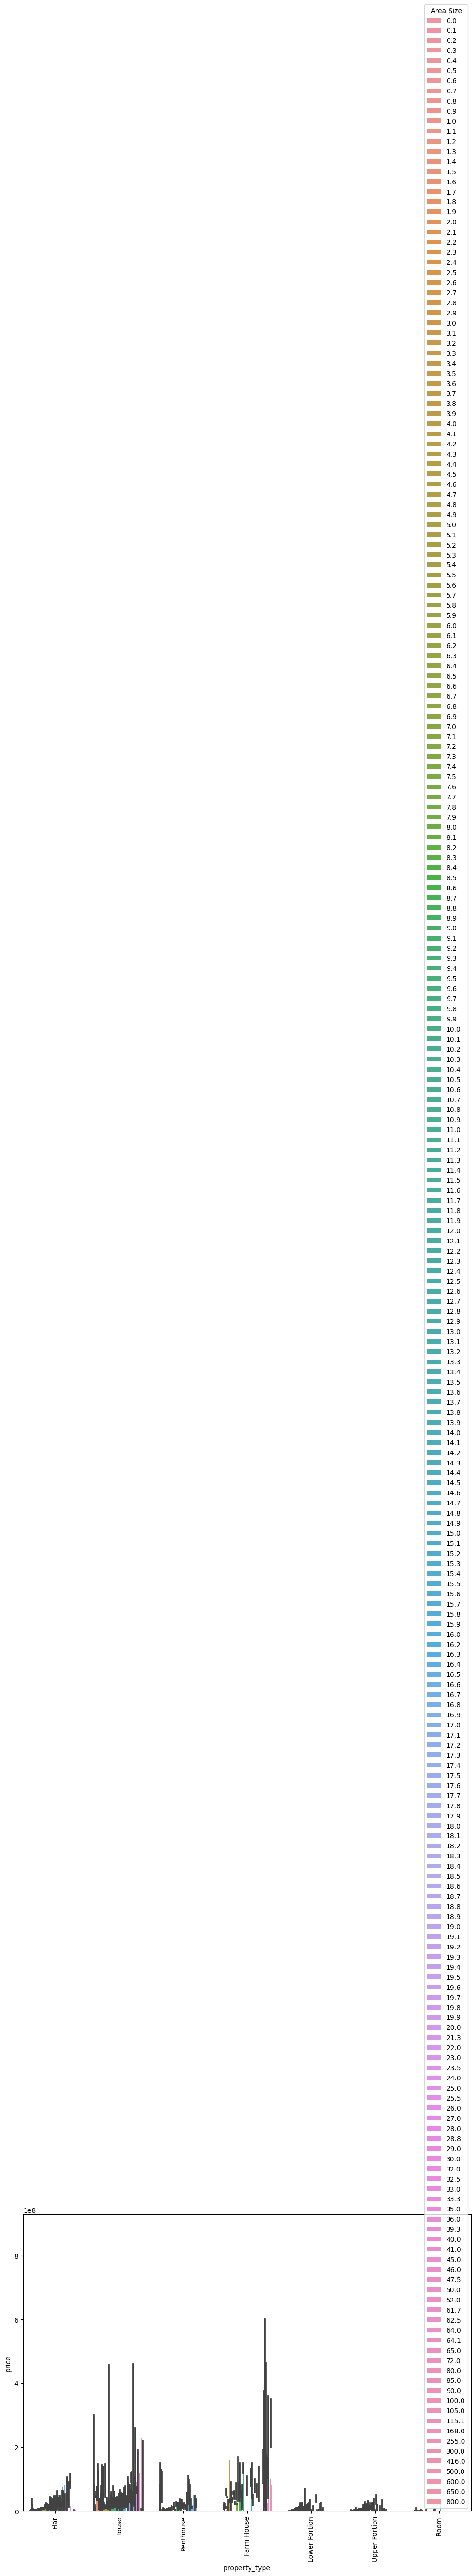

In [546]:
# The plot will display bars for each property_type, with the height of the bars representing the average price.
# The Area Size will be represented by different colors, allowing compare the price differences across different Area Size categories for each property type

plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "property_type", y = "price", hue = "Area Size");

In [547]:
# Grouping by city and property_type and counting occurrences of each property_type
df_location = df.groupby(by = ["city", "property_type"])["property_type"].count().to_frame(name='count').reset_index()

# Sorting by the 'count' column to get the most frequent property types
df_location_sorted = df_location.sort_values(by = "count", ascending = False)

# Filtering the data for Islamabad
df_location_Islamabad = df_location_sorted[df_location_sorted['city'] == "Islamabad"]

# Display the result
df_location_Islamabad

,city,property_type,count
9,Islamabad,House,19912
8,Islamabad,Flat,7114
13,Islamabad,Upper Portion,5484
10,Islamabad,Lower Portion,4250
12,Islamabad,Room,377
7,Islamabad,Farm House,240
11,Islamabad,Penthouse,49


In [548]:
# plt.figure(figsize = (12, 8))
# sns.barplot(data = df_location_usa, x = "city", y = 'area', hue = "property_type");

# ALIŞTIRMA: Bu yaptığımız işlemi bir fonksiyon haline getirin, bu fonksiyon kendi içinde yukarıdaki gruplama işlemini yaparak argüman olarak verilen ülke
#            ismine göre aşağıdaki grafiği oluşturmalıdır.

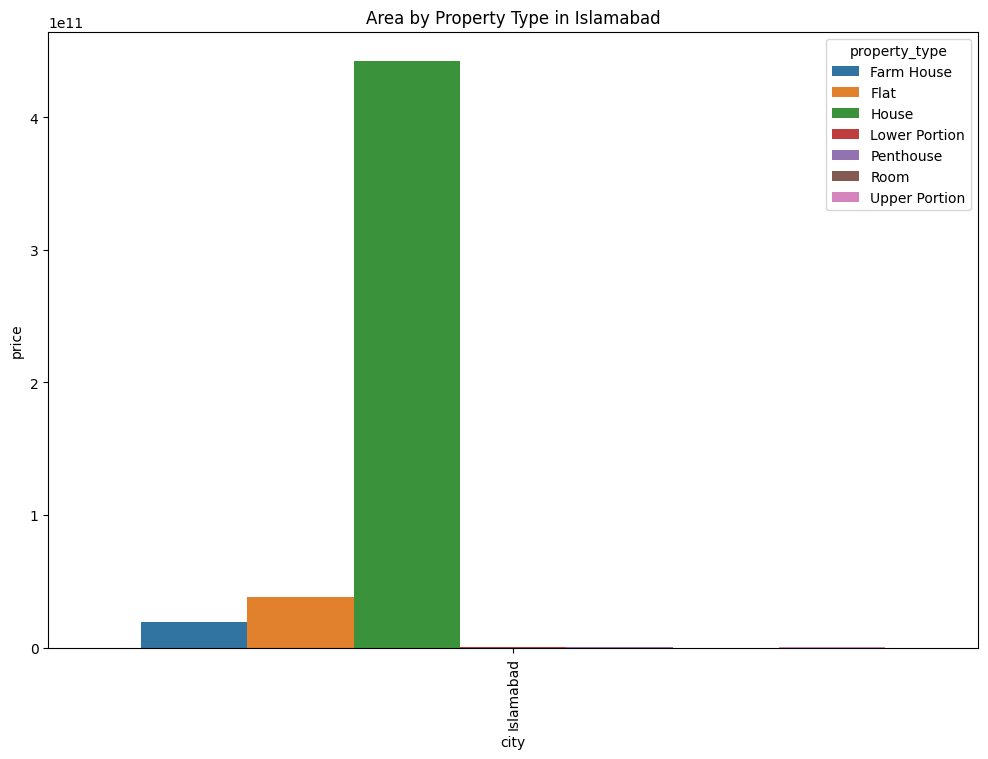

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_property_type_by_city(df, provience_name):
    # Grouping the data by city and property_type
    df_location = df.groupby(by = ["city", "property_type"])["price"].sum().to_frame().reset_index()

    # Filtering the data for the given provience_name (or city)
    df_location_provience_name = df_location[df_location['city'] == provience_name]

    # Plotting
    plt.figure(figsize = (12, 8))
    sns.barplot(data = df_location_provience_name, x = "city", y = "price", hue = "property_type")
    plt.title(f"Area by Property Type in {provience_name}")
    plt.xticks(rotation = 90)
    plt.show()

# Example usage of the function:
plot_property_type_by_city(df, "Islamabad")

## 4. Continuous Variable Analysis

### 4.1 Analysis of Continuous Variables

In [550]:
# Select numeric columns in the data set.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
0,237062,3325,10000000,33.679890,73.012640,2,2,4.0
1,346905,3236,6900000,33.700993,72.971492,3,3,5.6
2,386513,764,16500000,33.631486,72.926559,6,5,8.0
3,656161,340,43500000,33.707573,73.151199,4,4,2.0
4,841645,3226,7000000,33.492591,73.301339,3,3,8.0


In [551]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,168446.0,1.559626e+07,2.251207e+06,86575.000000,1.488320e+07,1.665851e+07,1.708662e+07,1.735772e+07
location_id,168446.0,4.375936e+03,3.776562e+03,1.000000,1.058000e+03,3.286000e+03,7.220000e+03,1.422000e+04
price,168446.0,1.776576e+07,3.531003e+07,0.000000,1.750000e+05,8.500000e+06,1.950000e+07,2.000000e+09
latitude,168446.0,2.985952e+01,3.807870e+00,11.052446,2.494854e+01,3.145978e+01,3.356089e+01,7.318409e+01
longitude,168446.0,7.123980e+01,3.133042e+00,25.906027,6.713036e+01,7.305618e+01,7.325987e+01,8.016143e+01
baths,168446.0,2.874227e+00,2.463400e+00,0.000000,0.000000e+00,3.000000e+00,4.000000e+00,4.030000e+02
bedrooms,168446.0,3.179422e+00,1.971401e+00,0.000000,2.000000e+00,3.000000e+00,4.000000e+00,6.800000e+01
Area Size,168446.0,5.892188e+00,5.778327e+00,0.000000,3.000000e+00,5.000000e+00,8.000000e+00,8.000000e+02


In [552]:
# Function to access statistical information about numeric columns in a data set
# give_stats, print out essential statistical information for numerical columns in a given DataFrame. 
# It loops through all numerical columns (integer and float types)

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [553]:
give_stats(dataframe = df)

**********property_id**********
Mean value of property_id is 15596255.49
Std value of property_id is 2251206.87
Max value of property_id is 17357718
Min value of property_id is 86575
Count value of property_id is 168446
Median value of property_id is 16658506.0

**********location_id**********
Mean value of location_id is 4375.94
Std value of location_id is 3776.56
Max value of location_id is 14220
Min value of location_id is 1
Count value of location_id is 168446
Median value of location_id is 3286.0

**********price**********
Mean value of price is 17765759.83
Std value of price is 35310032.32
Max value of price is 2000000000
Min value of price is 0
Count value of price is 168446
Median value of price is 8500000.0

**********latitude**********
Mean value of latitude is 29.86
Std value of latitude is 3.81
Max value of latitude is 73.184088
Min value of latitude is 11.052446
Count value of latitude is 168446
Median value of latitude is 31.459784000000003

**********longitude**********


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

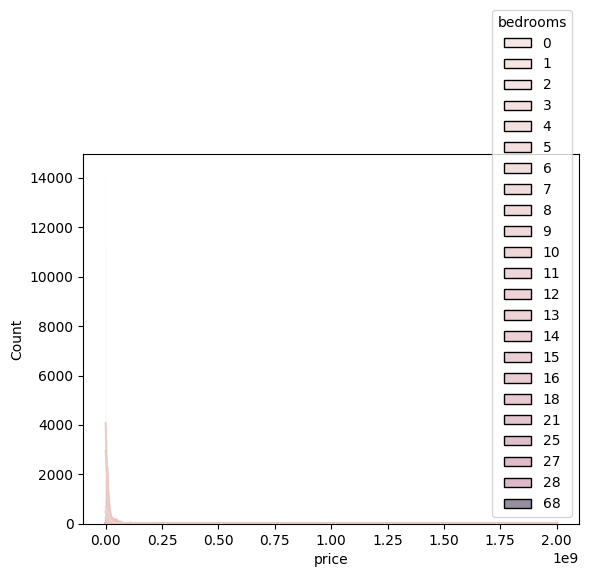

In [554]:
# Histogram to see the distribution of a numerical column..
sns.histplot(data = df, x = "price", kde = True, hue = "bedrooms");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


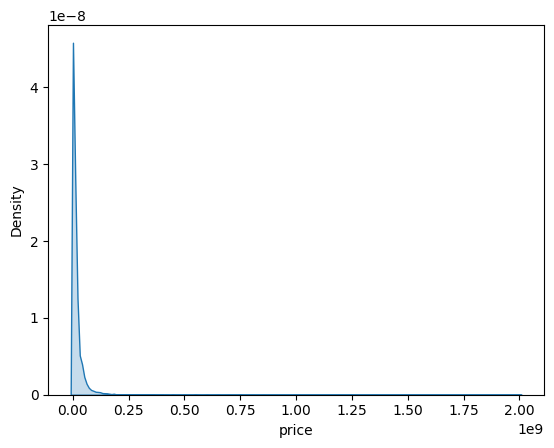

In [555]:
# kdeplot shows the density of the relevant numerical variable
sns.kdeplot(df['price'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

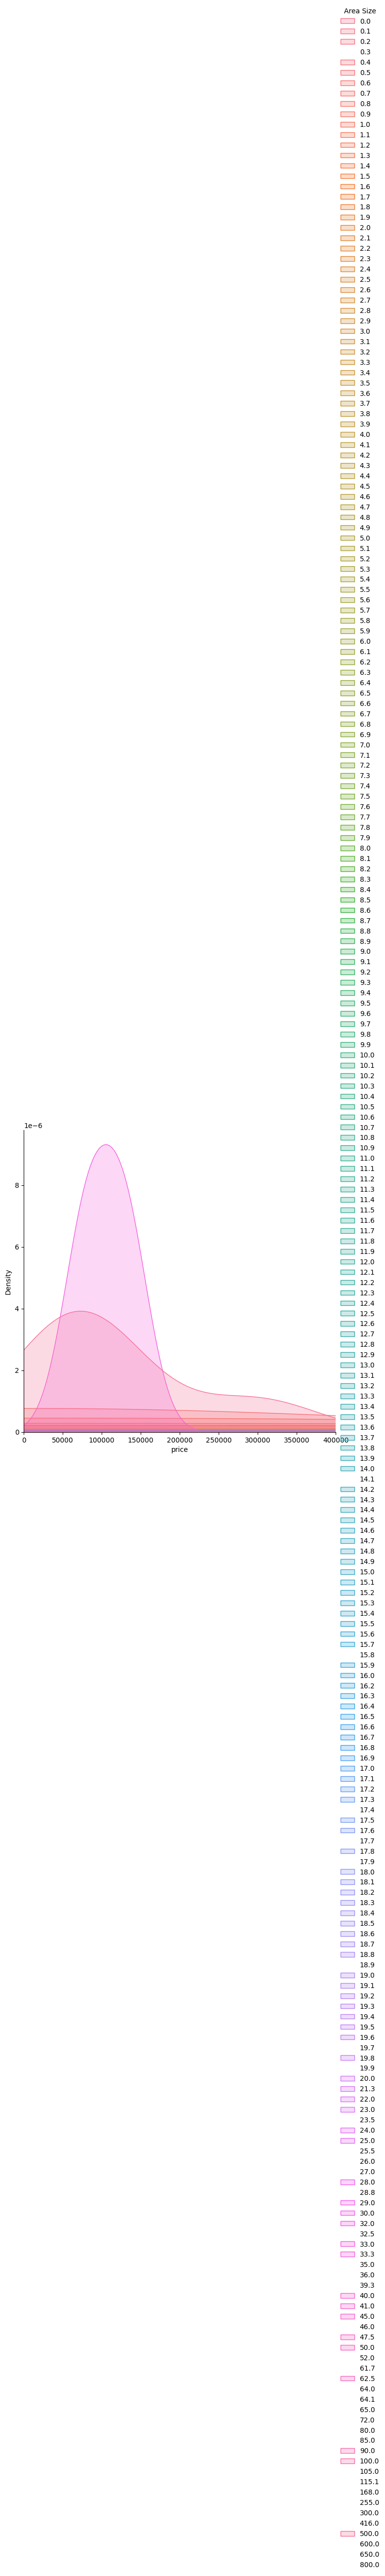

In [556]:
# Using FacetGrid we can observe density in categorical breakdown
sns.FacetGrid(data = df,
              hue = "Area Size",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "price", fill = True).add_legend();

<Figure size 1200x800 with 0 Axes>

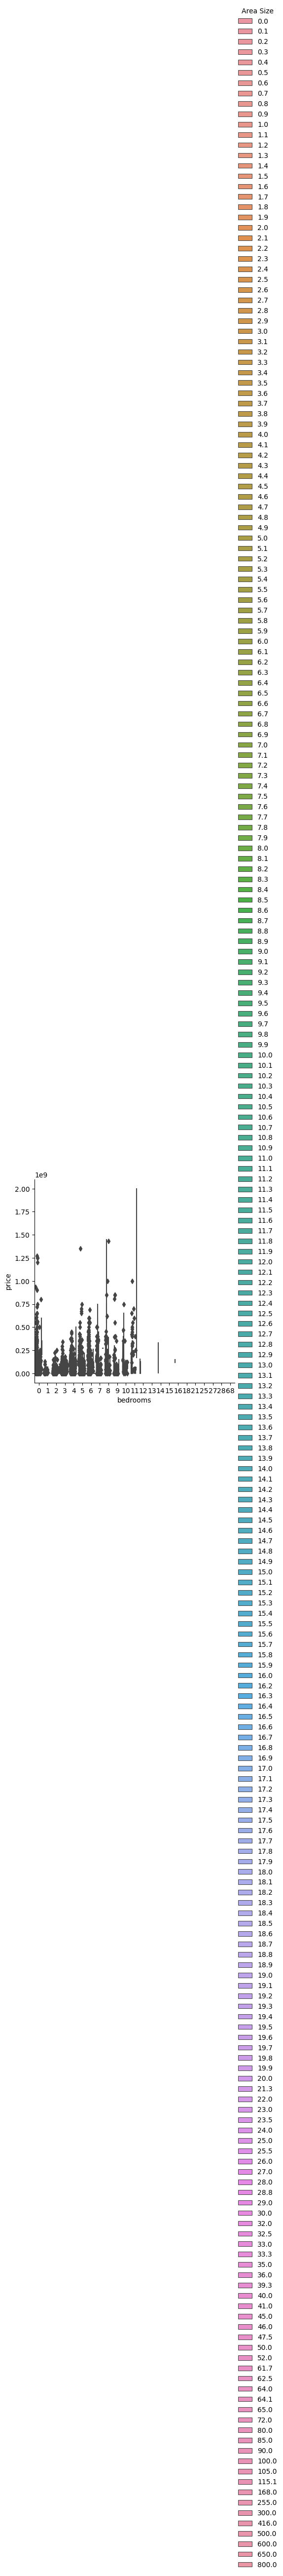

In [557]:
# With catplot, the distribution of a numerical variable on a categorical basis and in the mixture.
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x="bedrooms", y="price", hue="Area Size", kind="box")

<Figure size 1200x800 with 0 Axes>

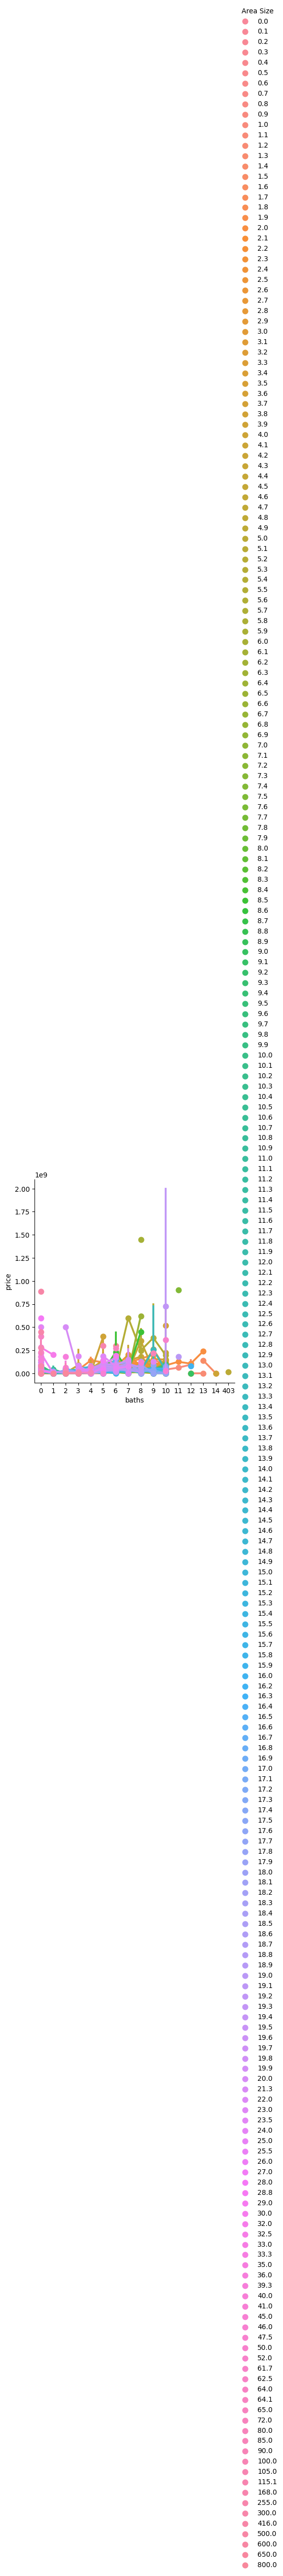

In [558]:
# With catplot, the distribution of a numerical variable on a categorical basis and in the mixture.
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x="baths", y="price", hue="Area Size", kind="point")

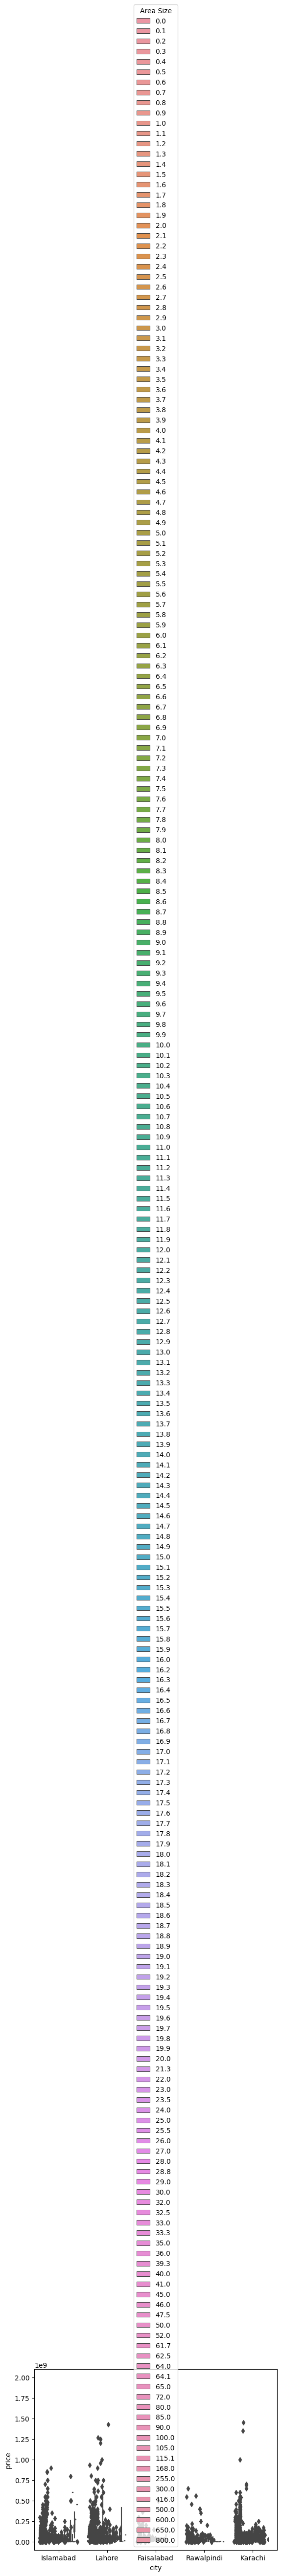

In [559]:
# Boxplot shows the numerical distribution categorically, quartile values ​​and outliers according to IQR can also be observed with boxplot.
sns.boxplot(data = df,
            x = "city",
            y = "price",
            hue = "Area Size");

## 5. Outlier Analysis
The analysis of outliers, like the analysis of missing data, should be conducted with care. The presence of outliers can affect the distributions in the dataset, and when we build a prediction model using a dataset with outliers, it can reduce the generalizability of the model.

To assess outliers, methods such as domain knowledge, standard deviation approach, Z-score, and the IQR method can be used. Here, we will apply a simple correction using the IQR method.

In [560]:
df = df_.copy()

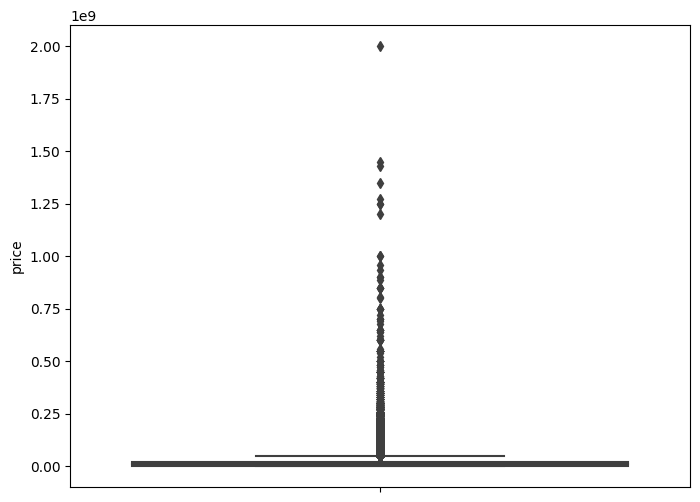

In [561]:
# Visualize outlier observations based on the IQR in a variable using a boxplot.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["price"],
            orient = "v");

In [562]:
df_price = df['price']
df_price

0         10000000
1          6900000
2         16500000
3         43500000
4          7000000
            ...   
168441    26500000
168442    12500000
168443    27000000
168444    11000000
168445     9000000
Name: price, Length: 168446, dtype: int64

In [563]:
# Determining the Quantile values.
Q1 = df_price.quantile(0.25)
Q3 = df_price.quantile(0.75)

print(Q1)
print(Q3)

# Determining the IQR value.
IQR = Q3 - Q1
print(IQR)

# Determining the lower and upper fences.
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR


175000.0
19500000.0
19325000.0


### 5.1 Deletion of Outlier Observations

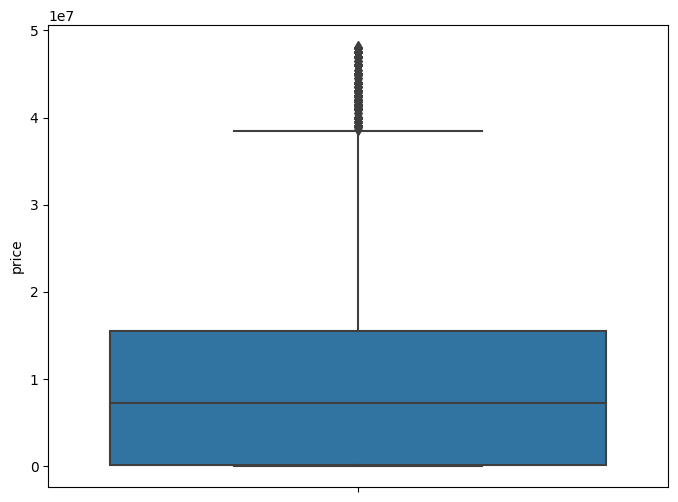

In [564]:
# Assuming you're working with the 'price' column for outlier detection

# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper fence for outliers
upper_fence = Q3 + 1.5 * IQR

# Filter out the outliers
df_del = df[df['price'] <= upper_fence]

# Now plot the boxplot
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del, y = "price", orient = "v");


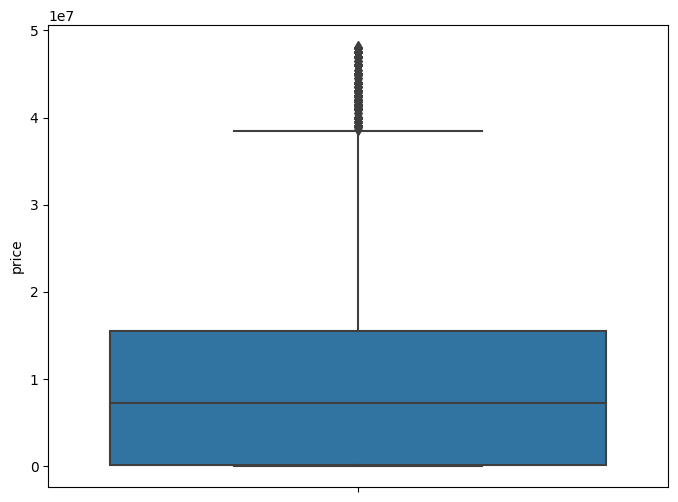

In [565]:
# plot the boxplot for the price column from the df_del DataFrame (which presumably contains the data after removing the outliers). 
# Make sure the column name is correctly referenced as "price"

plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del, y = "price", orient = "v");


### 5.2 Filling in Outlier Observations

In [566]:
df.loc[df_price > upper_fence, "price"] = df_price.mean()

/tmp/ipykernel_30/1774176133.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17765759.83221923' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df_price > upper_fence, "price"] = df_price.mean()


In [567]:
df.loc[df_price > upper_fence, "price"]

8         1.776576e+07
12        1.776576e+07
17        1.776576e+07
20        1.776576e+07
22        1.776576e+07
              ...     
168411    1.776576e+07
168414    1.776576e+07
168419    1.776576e+07
168427    1.776576e+07
168429    1.776576e+07
Name: price, Length: 13547, dtype: float64

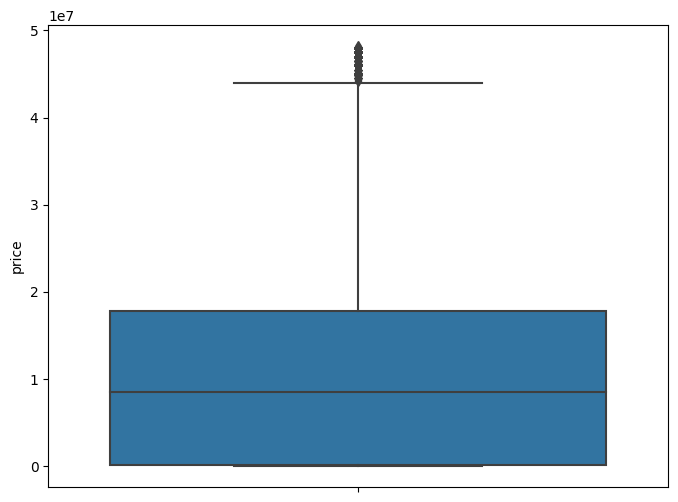

In [568]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["price"],
            orient = "v");

#### 5.2.2 Printing Method

In [569]:
df = df_.copy()

In [570]:
df.loc[df_price > upper_fence, "price"] = upper_fence

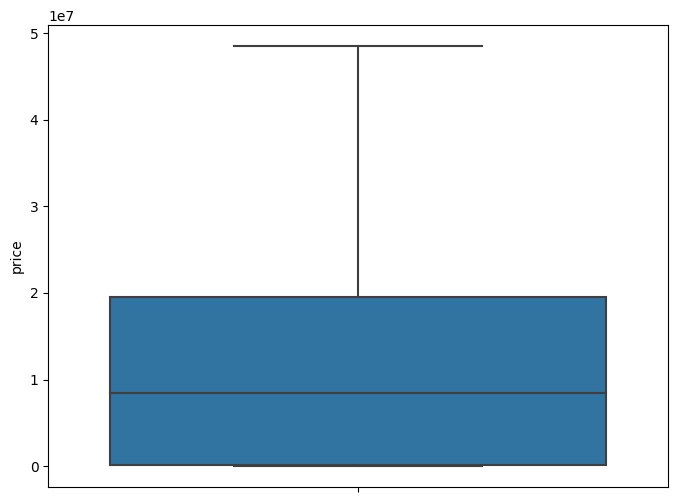

In [571]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["price"],
            orient = "v");

In [572]:
from sklearn.neighbors import LocalOutlierFactor

# Define the LOF model
lof = LocalOutlierFactor(n_neighbors=20)

# Fit the data (LOF does not require training the model)
y_pred = lof.fit_predict(df[['price', 'bedrooms', 'Area Size']])

# Outliers are labeled as -1, normals are labeled as 1
outliers = df[y_pred == -1]
normal = df[y_pred == 1]

print(outliers)  # Print outliers

        property_id  location_id  \
3            656161          340   
5            850762         3390   
6            937975          445   
7           1258636         3241   
10          1425602          429   
...             ...          ...   
168395     17354549        11748   
168404     17355517        13747   
168405     17354548          478   
168432     17354098         9031   
168444     17355251         6752   

                                                 page_url  property_type  \
3       https://www.zameen.com/Property/islamabad_bani...          House   
5       https://www.zameen.com/Property/ghauri_town_gh...          House   
6       https://www.zameen.com/Property/islamabad_kora...          House   
7       https://www.zameen.com/Property/e_11_e_11_4_ap...           Flat   
10      https://www.zameen.com/Property/islamabad_dipl...           Flat   
...                                                   ...            ...   
168395  https://www.zameen.com/Prop

## 6. Feature Engineering

* Feature Engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. This process helps to better represent the underlying patterns in the data. Common techniques include:

* Creating new features from existing ones, such as combining multiple columns or applying mathematical operations (e.g., creating a "total price" by multiplying "quantity" and "price").
Encoding categorical variables into numerical forms using methods like one-hot encoding or label encoding.

* Scaling features to standardize or normalize them to improve model performance, especially for algorithms sensitive to feature magnitude.
* Handling missing values by imputing or dropping them.
* Date-time features: Extracting useful information from date columns (e.g., extracting the day of the week or month).
* Aggregation: Summarizing or grouping data, such as calculating the average or sum for each group.

In [573]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [574]:
def price_range(bedrooms):
    if bedrooms < 80000:
        return 'Low'
    elif 80000 <= bedrooms <= 150000:
        return 'Medium'
    else:
        return 'High'

df['price_range'] = df['price'].apply(price_range)

df.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,price_range
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla,High
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla,High
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla,High


--

### 1. Handling Missing Values
- **Numerical Features**: Missing numerical values were filled with the **median** to maintain the distribution and prevent bias.
- **Categorical Features**: Missing categorical values were filled using **forward fill** to preserve temporal or group-based relationships.

---

### 2. Creating New Features
- A new feature called **`price_per_area`** was created to represent the cost per square meter of a property, providing insights into affordability and market trends.
- **Temporal Feature**: The **`days_since_added`** feature was derived from the `date_added` column to capture the recency of listings.

---

### 3. Encoding Categorical Variables
- **Label Encoding** and **One-Hot Encoding** were used to transform categorical variables into numerical form so that they can be used by machine learning algorithms.
- Rare categories within categorical variables were grouped under an **'Other'** category to reduce noise and ensure model stability.

---

### 4. Feature Transformation
- **Logarithmic Scaling** was applied to skewed numerical features, such as `price` and `area`, to normalize their distributions and make them more suitable for modeling.
- **Standardization** was applied to numerical features to ensure all features have comparable scales, preventing any one feature from dominating due to differences in magnitude.

---

### 5. Feature Selection
- **Correlation Matrix** was analyzed to identify and remove highly correlated features, thus addressing multicollinearity.
- **Feature Importance Scores** from models like Random Forest were used to select the most impactful features, reducing dimensionality and retaining the most predictive variables.

---

### 6. Group-Based Aggregations
- **Group-based Aggregations** were used to create new features such as the **mean `price`** and **median `area`** within each **`location`**, which helps capture regional market trends.
- Custom aggregations were performed at the **`province_name`** level to capture broader geographical patterns and trends.

---

### 7. Interaction Features
- Interaction features were created by combining related features, such as **`area * bedrooms`** to estimate living space per bedroom.
- **Categorical Interactions**: Combinations like **`property_type` and `purpose`** were merged to model nuanced dependencies between different categories.

---

### 8. Feature Binning
- Continuous features like **`price`** were **binned** into categories (e.g., low, medium, high) to simplify the analysis and model non-linear relationships.
- **Area** was discretized into **buckets** representing small, medium, and large properties to improve interpretability.

---

### 9. Target Encoding
- **Target Encoding** was applied to high-cardinality categorical variables like **`location_id`**, replacing categories with the **mean `price`** for each category, thus providing a data-driven representation of the categorical variables.

---

### 10. Domain Knowledge Features
- **Domain-Specific Features**: A new feature **`bathrooms_per_bedroom`** was calculated based on domain knowledge to represent the luxury or quality of the property.
- **External Features**: If available, regional economic indicators were integrated to capture macroeconomic effects on property prices.

---

These feature engineering techniques enhance the model’s ability to capture important patterns in the data and improve its predictive power and interpretability.
